# Machine Learning and Deep Learning in Stock Return Prediction

# Content

* [0. Enhancements](#0)
* [1. Problem Definition](#1)
    * [1.1 Why choose SPX?](#1.1)
    * [1.2 Which indicators should be used?](#1.2)  
* [2. Getting Started - Load Libraries and Dataset](#2)
    * [2.1. Load Libraries](#2.1)    
    * [2.2. Load Dataset](#2.2)
* [3. Exploratory Data Analysis](#3)
    * [3.1 Descriptive Statistics](#3.1)    
    * [3.2. Data Visualisation](#3.2)
    * [3.3. Time Series Analysis](#3.3)
* [4. Data Preparation](#4)
    * [4.1 Train/Validation/Test Split](#4.1)    
    * [4.2.Feature Selection](#4.2) 
    * [4.3.Standardize Data](#4.3) 
* [5. Model Development Training](#5)        
    * [5.1. Evaluation Metrics](#5.1)
    * [5.2. Compare Models and Algorithms](#5.2)
        * [5.2.1 Machine Learning models-scikit-learn](#5.2.1)
        * [5.2.2 Time Series based Models-ARIMA and LSTM](#5.2.2)
* [6. Model Tuning and grid search](#6)   
    * [6.1 Grid Search for LASSO Model](#6.1)
    * [6.2 Grid Search for EN Model](#6.2)
    * [6.3 Grid Search for ABR Model](#6.3)
    * [6.4 Grid Search for ARIMA Model](#6.4)
    * [6.4 Grid Search for LSTM Model](#6.5)
* [7. Model Testing](#7)
    * [7.1. Testing results](#7.1)
    * [7.2. MSE as the criterion?](#7.2)
* [8. Model Evaluation](#8)
    * [8.1. Evaluate by Sharpe ratio and CAGR](#8.1)
    * [8.2. White Reality Check](#8.2)  
* [9. Walk-forward harness](#9)

<a id='0'></a>
# 0. Enhancements

The following enhancements will be implemented:

1. Apply the model to **new data**.

2. Incorporate **new indicator** inputs into the model.

3. **Program a new indicator**, such as GEX for any stock using WRDS data.

4. Utilize **a model not discussed by Tatsat**, limited to Scikit-learn or Keras-Tensorflow, such as XGBoost and Bayesian.

5. Increase the number of **model parameter grids** used during cross-validation.

6. Adapt Tatsat's code to include a pipeline with grid search, **optimizing the parameters of a model**.

7. Replace a model with an **advanced version of the same model**, for example, using a sequence-to-sequence LSTM instead of a sequence-to-vector LSTM.

8. Include a **benchmark**, such as employing a buy and hold benchmark, which is challenging to outperform.

9. **Objective function change:** Given the goal of maximizing returns, the objective function will determine the position based on the predicted stock price to calculate the cumulative returns of the test set. The evaluation will involve comparing the **cumulative returns** and utilizing metrics such as **CAGR, Sharpe Ratio, and White Reality Check** to assess the results and model performance simultaneously.

10. Implement a **walk-forward harness**, which involves a loop where the model predicts n items and moves forward n items (n can be any positive integer).

<a id='1'></a>
# 1. Problem Definition

Stock return prediction is a prominent and complex challenge within the field of finance. However, recent advancements in machine learning have provided new avenues for addressing this question by leveraging non-deterministic solutions that learn from data to generate more accurate predictions. Machine learning techniques are particularly well-suited for stock return prediction, utilizing historical data to forecast future price movements.

This case study focuses on utilizing various supervised learning-based models to predict the stock price of the **SPX** index (S&P 500) by leveraging correlated assets and historical data. The key objectives of this study are as follows:

- **Data Visualization**: Employing diverse chart types, such as density plots, correlation matrices, and scatterplots, to effectively visualize and gain insights into the underlying data.

- **Machine Learning Models:** Examining a range of machine learning models with varying complexities to predict stock returns. Examples of these models include Linear Regression, Lasso, ElasticNet, Decision Tree, K-nearest neighbors (KNN), Random Forest, Gradient Boosting, ExtraTrees, AdaBoost, and Multi-layer Perceptron.

- **Time Series Models:** Implementing grid search to optimize parameters for the ARIMA model. This optimization process aims to enhance the predictive accuracy of the models.

- **Deep Learning (LSTM) Models:** Harnessing deep learning techniques, specifically Long Short-Term Memory (LSTM) models, for time series forecasting. LSTM models are particularly effective in capturing temporal dependencies present in the data. Implementing grid search to optimize parameters for the LSTM model.

- **Result Interpretation and Model Evaluation:** Thoroughly interpreting the results and scrutinizing potential issues of overfitting or underfitting across the employed models. This evaluation process ensures the reliability and generalizability of the predictive models.

By conducting this comprehensive analysis, our aim is to advance our understanding of stock price prediction and identify effective methodologies for forecasting the SPX index using a combination of supervised learning techniques, time series models, and deep learning approaches.

<a id='1.1'></a>

## 1.1 Why choose SPX?

There are several **reasons** why one might prefer to predict the return of SPX (S&P 500 Index) rather than focusing on a single stock. Here are a few key reasons:

1. **Diversification**: The S&P 500 Index represents a diversified portfolio of 500 large-cap U.S. stocks from various sectors. By using the index, you capture the collective performance of a broad range of companies, which helps reduce the impact of individual stock-specific risks and provides a more comprehensive view of the overall market.

2. **Market Representation**: The S&P 500 is widely regarded as a benchmark for the U.S. stock market. It represents a significant portion of the total market capitalization in the United States and serves as a reliable indicator of the overall market sentiment and trends. Predicting its price allows for insights into the broader market movements and potential investment opportunities.

3. **Liquidity and Stability**: The S&P 500 is highly liquid and traded actively, which ensures reliable price data and availability of historical information. Additionally, as an index, it is less susceptible to abrupt price changes caused by company-specific events or news, making it a more stable and consistent target for prediction.

4. **Availability of Historical Data**: Historical price and volume data for the S&P 500 are widely available and span a significant timeframe. This extensive historical dataset enables robust backtesting, model training, and evaluation, supporting the development and refinement of predictive models.

5. **General Economic Indicator**: As a broad market index, the S&P 500 reflects the collective performance of the underlying companies, making it sensitive to economic conditions and macroeconomic factors. Predicting its price can provide insights into the overall health of the economy and help anticipate market trends.

While individual stocks can also be the focus of prediction models, using the S&P 500 as a target has distinct advantages in terms of diversification, market representation, liquidity, stability, and availability of historical data. It offers a broader perspective on the market and can be valuable for various financial analysis and investment strategies.

<a id='1.2'></a>
## 1.2 Which indicators should be used?

The stocks depends on and interacts with many external factors, including its competitors, clients, the global economy, the geopolitical situation, fiscal and monetary policies, access to capital, and so on. Hence, its stock price may be correlated not only with the stock price of other companies but also with other assets such as commodities, FX, broad-based indices, or even fixed income securities.
The SPX refers to the S&P 500 index, which is a stock market index that measures the performance of 500 large publicly traded companies listed on US stock exchanges. 
For this case study, other than the historical data of SPX, the independent variables used are the following potentially correlated as:


* **Technical/Ta-lib indicators: BBANDS, MA, DEMA, EMA, WMA**

 - BBANDS: Bollinger Bands is an indicator that measures volatility and shows the upper, lower, and middle bands around a moving average.
 - MA: Moving Average is a commonly used indicator that calculates the average price over a specific period and helps identify trends.
 - DEMA: Double Exponential Moving Average is a smoother version of the traditional moving average that gives more weight to recent prices.
 - EMA: Exponential Moving Average is a type of moving average that gives more weight to recent prices and responds faster to changes in the market.
 - WMA: Weighted Moving Average is a moving average that assigns weights to different prices based on their significance in the calculation.


* **Sentiment indicators: DIX, GEX and VIX(for the S&P500 and the SPY ETF only)**

 - DIX: Dark Pool Index measures institutional trading in private venues, providing insights into institutional sentiment. [Source: https://squeezemetrics.com/monitor/dix]
 - GEX: Gamma Exposure Index measures options gamma exposure, indicating potential market movement based on options positions. [Source: https://squeezemetrics.com/monitor/gex]
 - VIX: Cboe S&P 500 9-Day Volatility Index reflects market expectations for near-term volatility, representing investor sentiment and market uncertainty. [Source: https://www.cboe.com/tradable_products/vix/vix_historical_data/]


* **Money Flow: Fund flow for SPY, DXY(DX-Y.NYB)**
 - Fund flow for SPY  [Source: https://wrds-www.wharton.upenn.edu/pages/get-data/etf-global/fund-flow/]
 - DXY: the US dollar against a basket of major currencies, including the Japanese Yen and Euro. Changes in the US dollar can impact the US economy and liquidity conditions, influencing market dynamics. US Dollar up ==> US economy down and liquidity down


* **Indices: Dow Jones, NASDAQ**

 - Dow Jones: Index tracking 30 large companies' stock performance.
 - NASDAQ: Index representing 3,000+ stocks on NASDAQ exchange, mainly technology-focused.


* **Macro indicators: GDP, CPI, Interest Rate, Unemployment Rate**

 - GDP: Gross Domestic Product measures the total value of goods and services produced within a country, indicating the size and growth of the economy.
 - CPI: Consumer Price Index tracks changes in the average prices of a basket of goods and services, providing insight into inflation and cost of living.
 - Interest Rate: Interest Rate represents the cost of borrowing money or the return on savings, influencing borrowing costs and economic activity.
 - Unemployment Rate: represents the percentage of the labor force that is unemployed but actively seeking employment and willing to work. It is a measure used to determine the health of an economy.


<a id='2'></a>
# 2. Getting Started- Loading the data and python packages

<a id='2.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import os
import json

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import pandas_datareader as pdr
from pandas_datareader import data as pdr
from functools import reduce

import yfinance as yf
yf.pdr_override()
import talib

from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor
import scikeras
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


2023-08-21 01:05:59.794629: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2.2'></a>
## 2.2. Loading the Data

Next, we extract the data required for our analysis.

In [3]:
def fetch_and_save_symbol_data(symbol, start_date, end_date):
    
    # Specify the path to the "input" directory
    input_dir = 'input'
    if not os.path.exists(input_dir):
        os.makedirs(input_dir)
    
    address = os.path.join(input_dir, symbol + '.csv')
    msg = ""

    try:
        df = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
        df.to_csv(address, header=True, index=True, encoding='utf-8')
    except Exception:
        msg = "yahoo problem"
        df = pd.DataFrame()

    return df, msg

In [4]:
def process_yahoo_data(file_path, label):

    df = pd.read_csv(file_path, parse_dates=['Date'])
    df = df.sort_values(by='Date')
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': label}, inplace=True)
    df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    
    return df

In [5]:
def plot_timeseries(df, column, title='SPY', xlabel='Date', ylabel='Value', figsize=(20, 5)):

    plt.figure(figsize=figsize)
    plt.plot(df.index, df[column], label=column)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=20)
    plt.grid(True)
    plt.legend()
    plt.show()

### 2.2.1. Load SPX from Yahoo

In [6]:
start_date = '2017-08-01' 
end_date = '2023-07-31' 
#end_date = datetime.now() 

In [7]:
# Fetch SPY data
SPY, message = fetch_and_save_symbol_data('SPY', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [8]:
SPY

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-08-01  247.460007  247.500000  246.720001  247.320007  223.118774   
2017-08-02  247.470001  247.600006  246.369995  247.440002  223.227036   
2017-08-03  247.309998  247.339996  246.639999  246.960007  222.794037   
2017-08-04  247.520004  247.789993  246.970001  247.410004  223.199982   
2017-08-07  247.490005  247.869995  247.369995  247.869995  223.614960   
...                ...         ...         ...         ...         ...   
2023-07-24  453.369995  455.040009  452.299988  454.200012  454.200012   
2023-07-25  453.920013  456.739990  453.869995  455.440002  455.440002   
2023-07-26  454.470001  456.989990  453.380005  455.510010  455.510010   
2023-07-27  459.019989  459.440002  451.549988  452.489990  452.489990   
2023-07-28  455.880005  457.779999  452.489990  456.920013  456.920013   

              Volume  
Date                  
2017-08-01  55050400  
2017-08-02  47211200  
2017-08-03  40856000  
2017-08-04  60191800  
2017-08-07  31995000  
...              ...  
2023-07-24  54023400  
2023-07-25  55191200  
2023-07-26  71052900  
2023-07-27  92194400  
2023-07-28  80011800  

[1508 rows x 6 columns]

In [9]:
SPY = process_yahoo_data('./input/SPY.csv', 'SPY')
SPY

SPY
Date                  
2017-08-01  223.118774
2017-08-02  223.227036
2017-08-03  222.794037
2017-08-04  223.199982
2017-08-07  223.614960
...                ...
2023-07-24  454.200012
2023-07-25  455.440002
2023-07-26  455.510010
2023-07-27  452.489990
2023-07-28  456.920013

[1508 rows x 1 columns]

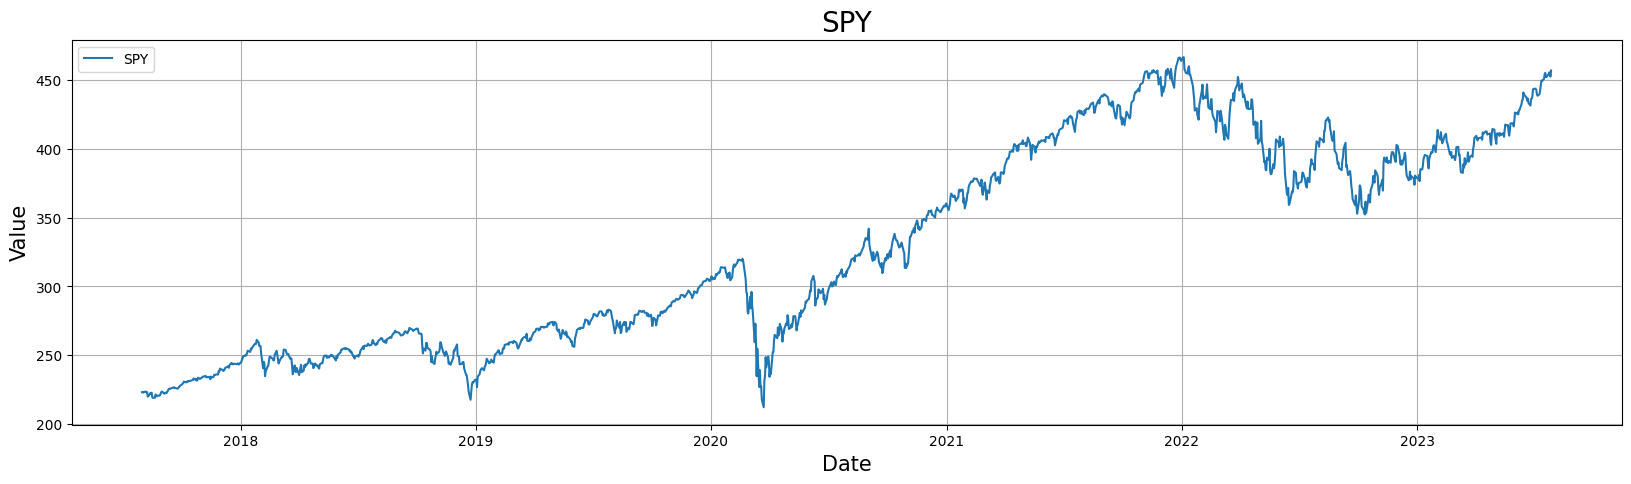

In [10]:
# plot SPY
plot_timeseries(SPY, column='SPY', title='SPY')

### 2.2.2. Load Technical/Ta-lib indicators: BBANDS, MA, DEMA, EMA, WMA

In [11]:
return_period = 5

In [12]:
# SPY 5, 15, 30, 60 Business Day Returns 
SPY_diff = pd.concat([np.log(SPY.loc[:, 'SPY']).diff(i) for i in 
                [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
SPY_diff.columns = ['SPY_DT', 'SPY_3DT', 'SPY_6DT', 'SPY_12DT']
SPY = pd.concat([SPY, SPY_diff], axis=1)
SPY

SPY    SPY_DT   SPY_3DT   SPY_6DT  SPY_12DT
Date                                                          
2017-08-01  223.118774       NaN       NaN       NaN       NaN
2017-08-02  223.227036       NaN       NaN       NaN       NaN
2017-08-03  222.794037       NaN       NaN       NaN       NaN
2017-08-04  223.199982       NaN       NaN       NaN       NaN
2017-08-07  223.614960       NaN       NaN       NaN       NaN
...                ...       ...       ...       ...       ...
2023-07-24  454.200012  0.007425  0.024336  0.060485  0.119940
2023-07-25  455.440002  0.002748  0.025912  0.061419  0.102954
2023-07-26  455.510010  0.000681  0.027555  0.052542  0.094608
2023-07-27  452.489990  0.000685  0.028764  0.039319  0.088967
2023-07-28  456.920013  0.010428  0.041035  0.047871  0.110012

[1508 rows x 5 columns]

In [13]:
# replace the NA values in the beginning with the values from SPY_DT.
# BBANDS (Bollinger Bands) 
SPY['BBANDS_upper20'], SPY['BBANDS_middle20'], SPY['BBANDS_lower20'] = talib.BBANDS(SPY['SPY_DT'], timeperiod=20)
SPY['BBANDS_upper20'].fillna(SPY['SPY_DT'], inplace=True)
SPY['BBANDS_middle20'].fillna(SPY['SPY_DT'], inplace=True)
SPY['BBANDS_lower20'].fillna(SPY['SPY_DT'], inplace=True)

# MA (Moving Average) 
SPY['MA20'] = talib.MA(SPY['SPY_DT'], timeperiod=20)
SPY['MA20'].fillna(SPY['SPY_DT'], inplace=True)

SPY['MA50'] = talib.MA(SPY['SPY_DT'], timeperiod=50)
SPY['MA50'].fillna(SPY['SPY_DT'], inplace=True)

# DEMA (Double Exponential Moving Average) 
SPY['DEMA20'] = talib.DEMA(SPY['SPY_DT'], timeperiod=20)
SPY['DEMA20'].fillna(SPY['SPY_DT'], inplace=True)

# EMA (Exponential Moving Average) 
SPY['EMA20'] = talib.EMA(SPY['SPY_DT'], timeperiod=20)
SPY['EMA20'].fillna(SPY['SPY_DT'], inplace=True)

# WMA (Weighted Moving Average) 
SPY['WMA20'] = talib.WMA(SPY['SPY_DT'], timeperiod=20)
SPY['WMA20'].fillna(SPY['SPY_DT'], inplace=True)
SPY

SPY    SPY_DT   SPY_3DT   SPY_6DT  SPY_12DT  \
Date                                                             
2017-08-01  223.118774       NaN       NaN       NaN       NaN   
2017-08-02  223.227036       NaN       NaN       NaN       NaN   
2017-08-03  222.794037       NaN       NaN       NaN       NaN   
2017-08-04  223.199982       NaN       NaN       NaN       NaN   
2017-08-07  223.614960       NaN       NaN       NaN       NaN   
...                ...       ...       ...       ...       ...   
2023-07-24  454.200012  0.007425  0.024336  0.060485  0.119940   
2023-07-25  455.440002  0.002748  0.025912  0.061419  0.102954   
2023-07-26  455.510010  0.000681  0.027555  0.052542  0.094608   
2023-07-27  452.489990  0.000685  0.028764  0.039319  0.088967   
2023-07-28  456.920013  0.010428  0.041035  0.047871  0.110012   

            BBANDS_upper20  BBANDS_middle20  BBANDS_lower20      MA20  \
Date                                                                    
2017-08-01             NaN              NaN             NaN       NaN   
2017-08-02             NaN              NaN             NaN       NaN   
2017-08-03             NaN              NaN             NaN       NaN   
2017-08-04             NaN              NaN             NaN       NaN   
2017-08-07             NaN              NaN             NaN       NaN   
...                    ...              ...             ...       ...   
2023-07-24        0.034890         0.009741       -0.015409  0.009741   
2023-07-25        0.032690         0.010799       -0.011092  0.010799   
2023-07-26        0.032518         0.010949       -0.010620  0.010949   
2023-07-27        0.032602         0.010817       -0.010969  0.010817   
2023-07-28        0.032694         0.011155       -0.010384  0.011155   

                MA50    DEMA20     EMA20     WMA20  
Date                                                
2017-08-01       NaN       NaN       NaN       NaN  
2017-08-02       NaN       NaN       NaN       NaN  
2017-08-03       NaN       NaN       NaN       NaN  
2017-08-04       NaN       NaN       NaN       NaN  
2017-08-07       NaN       NaN       NaN       NaN  
...              ...       ...       ...       ...  
2023-07-24  0.010268  0.012754  0.011453  0.012254  
2023-07-25  0.009980  0.011051  0.010624  0.011588  
2023-07-26  0.010045  0.009206  0.009677  0.010624  
2023-07-27  0.010045  0.007620  0.008821  0.009647  
2023-07-28  0.010287  0.008026  0.008974  0.009610  

[1508 rows x 13 columns]

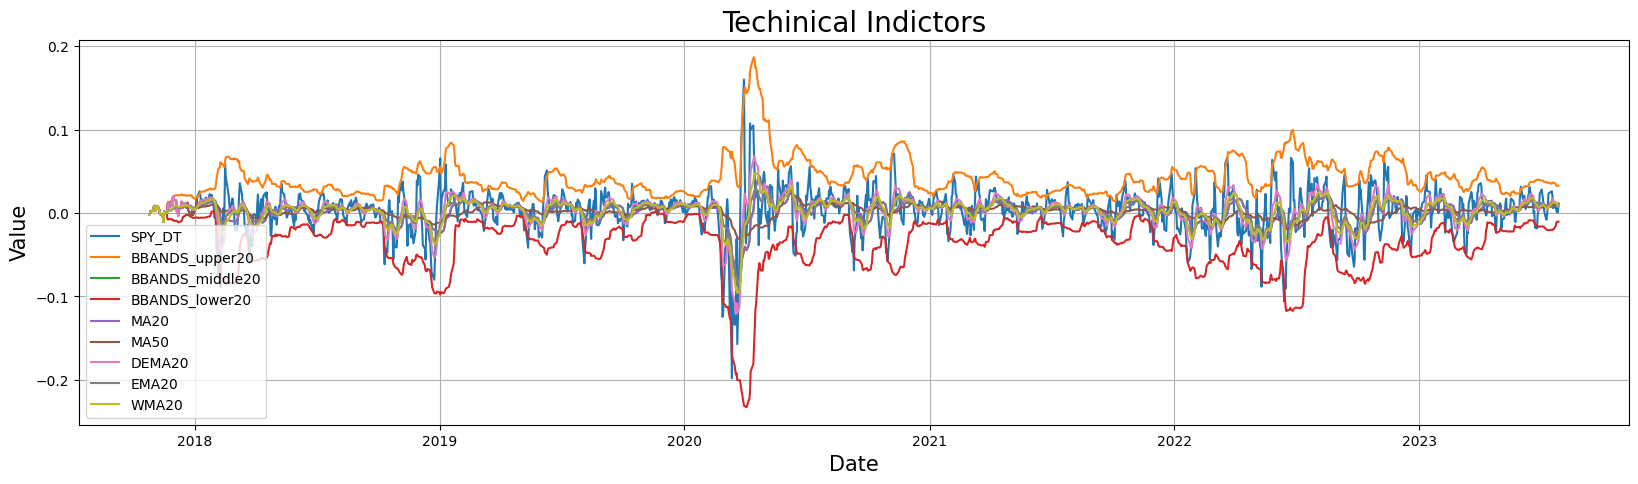

In [14]:
# plot techinical Indictors
plot_columns = ['SPY_DT', 'BBANDS_upper20','BBANDS_middle20', 'BBANDS_lower20', 'MA20', 'MA50',
                'DEMA20','EMA20', 'WMA20']
plot_timeseries(SPY, column=plot_columns, title='Techinical Indictors')

### 2.2.3. Sentiment indicators: DIX, GEX and VIX(for the S&P500 and the SPY ETF only)

In [15]:
# DIX, GEX for SPY
SPY_DIX_GEX = pd.read_csv('./input/SPY_DIX_GEX.csv', parse_dates=['date'])
SPY_DIX_GEX = SPY_DIX_GEX.sort_values(by='date')
SPY_DIX_GEX.drop('price', axis=1, inplace=True)
SPY_DIX_GEX.rename(columns={'date': 'Date','dix': 'DIX','gex': 'GEX'}, inplace=True)
SPY_DIX_GEX.set_index('Date', inplace = True)

In [16]:
# Cboe S&P 500 Index 9-Day Volatility Index (VIX9D℠) for SPY
SPY_VIX9D = pd.read_csv('./input/VIX9D_History.csv', 
                        parse_dates=['DATE'])
SPY_VIX9D = SPY_VIX9D.sort_values(by='DATE')
SPY_VIX9D.drop(['OPEN', 'HIGH', 'LOW'], axis=1, inplace=True)
SPY_VIX9D.rename(columns={'DATE': 'Date', 'CLOSE': 'VIX9D'}, inplace=True)
SPY_VIX9D.set_index('Date', inplace = True)

In [17]:
DIX_GEX_VIX = SPY_DIX_GEX.join(SPY_VIX9D, how='left')
DIX_GEX_VIX.fillna(method='ffill', inplace=True)
# # Lagged values
# for column in ['DIX', 'GEX', 'VIX9D']:
#     for i in range(2, 4):  # three days as an example
#         DIX_GEX_VIX[f'{column}_lag{i}'] = DIX_GEX_VIX[column].shift(i)

# # Moving Averages
# for column in ['DIX', 'GEX', 'VIX9D']:
#     DIX_GEX_VIX[f'{column}_MA5'] = DIX_GEX_VIX[column].rolling(window=5).mean()

### 2.2.4. Money Flow: Fund flow for SPY - DXY(DX-Y.NYB)

In [18]:
# Fetch DXY data
DXY, message = fetch_and_save_symbol_data('DX-Y.NYB', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [19]:
DXY = process_yahoo_data('./input/DX-Y.NYB.csv', 'DXY')

### 2.2.5. Indices: Dow Jones, NASDAQ

In [20]:
DJI, message = fetch_and_save_symbol_data('^DJI', start_date, end_date)
IXIC, message = fetch_and_save_symbol_data('^IXIC', start_date, end_date)
DJI = process_yahoo_data('./input/^DJI.csv', 'DJI')
IXIC = process_yahoo_data('./input/^IXIC.csv', 'IXIC')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 2.2.6. Macro indicators: GDP, CPI, Interest Rate

In [21]:
# Fetch Macro indicators
gdp = pdr.get_data_fred("GDP", start=start_date, end=end_date)  
cpi = pdr.get_data_fred("CPIAUCNS",  start=start_date, end=end_date)
interest_rate = pdr.get_data_fred("FEDFUNDS", start=start_date, end=end_date)
unemployment_rate = pdr.get_data_fred("UNRATE", start=start_date, end=end_date)

# Resample to daily and forward-fill missing values
gdp = gdp.resample('D').ffill()
cpi = cpi.resample('D').ffill()
interest_rate = interest_rate.resample('D').ffill()
unemployment_rate = unemployment_rate.resample('D').ffill()

# Combine into one DataFrame
macro = pd.concat([gdp, cpi, interest_rate, unemployment_rate], axis=1)
macro['GDP'] = macro['GDP'].ffill()
macro.columns = ['GDP', 'CPI', 'Interest_Rate', 'Unemployment_Rate']
macro.to_csv('./input/macro.csv', header=True, index=True, encoding='utf-8')

macro

GDP      CPI  Interest_Rate  Unemployment_Rate
DATE                                                            
2017-08-01        NaN  245.519           1.16                4.4
2017-08-02        NaN  245.519           1.16                4.4
2017-08-03        NaN  245.519           1.16                4.4
2017-08-04        NaN  245.519           1.16                4.4
2017-08-05        NaN  245.519           1.16                4.4
...               ...      ...            ...                ...
2023-06-27  26834.953  305.109           5.08                3.6
2023-06-28  26834.953  305.109           5.08                3.6
2023-06-29  26834.953  305.109           5.08                3.6
2023-06-30  26834.953  305.109           5.08                3.6
2023-07-01  26834.953  305.691           5.12                3.5

[2161 rows x 4 columns]

### 2.2.7 We choose to predict using weekly returns. We approximate this by using 5 business day period returns.

In [22]:
# List of dataframes to join
dfs = [DIX_GEX_VIX, DXY, DJI, IXIC, macro]

# Using reduce to join dataframes
predictors = reduce(lambda df1, df2: df1.join(df2, how='left'), dfs, SPY)
predictors

SPY    SPY_DT   SPY_3DT   SPY_6DT  SPY_12DT  \
Date                                                             
2017-08-01  223.118774       NaN       NaN       NaN       NaN   
2017-08-02  223.227036       NaN       NaN       NaN       NaN   
2017-08-03  222.794037       NaN       NaN       NaN       NaN   
2017-08-04  223.199982       NaN       NaN       NaN       NaN   
2017-08-07  223.614960       NaN       NaN       NaN       NaN   
...                ...       ...       ...       ...       ...   
2023-07-24  454.200012  0.007425  0.024336  0.060485  0.119940   
2023-07-25  455.440002  0.002748  0.025912  0.061419  0.102954   
2023-07-26  455.510010  0.000681  0.027555  0.052542  0.094608   
2023-07-27  452.489990  0.000685  0.028764  0.039319  0.088967   
2023-07-28  456.920013  0.010428  0.041035  0.047871  0.110012   

            BBANDS_upper20  BBANDS_middle20  BBANDS_lower20      MA20  \
Date                                                                    
2017-08-01             NaN              NaN             NaN       NaN   
2017-08-02             NaN              NaN             NaN       NaN   
2017-08-03             NaN              NaN             NaN       NaN   
2017-08-04             NaN              NaN             NaN       NaN   
2017-08-07             NaN              NaN             NaN       NaN   
...                    ...              ...             ...       ...   
2023-07-24        0.034890         0.009741       -0.015409  0.009741   
2023-07-25        0.032690         0.010799       -0.011092  0.010799   
2023-07-26        0.032518         0.010949       -0.010620  0.010949   
2023-07-27        0.032602         0.010817       -0.010969  0.010817   
2023-07-28        0.032694         0.011155       -0.010384  0.011155   

                MA50  ...       DIX           GEX  VIX9D         DXY  \
Date                  ...                                              
2017-08-01       NaN  ...  0.392661  2.618835e+09   8.93   93.029999   
2017-08-02       NaN  ...  0.394948  2.863270e+09   8.68   92.830002   
2017-08-03       NaN  ...  0.396442  2.455823e+09   9.31   92.809998   
2017-08-04       NaN  ...  0.401827  2.745629e+09   8.58   93.540001   
2017-08-07       NaN  ...  0.398231  2.427473e+09   8.43   93.430000   
...              ...  ...       ...           ...    ...         ...   
2023-07-24  0.010268  ...  0.458545  4.221233e+09  13.41  101.349998   
2023-07-25  0.009980  ...  0.483709  4.521150e+09  13.49  101.349998   
2023-07-26  0.010045  ...  0.472660  4.482259e+09  11.74  100.889999   
2023-07-27  0.010045  ...  0.468205  3.742041e+09  13.47  101.769997   
2023-07-28  0.010287  ...  0.471267  4.630459e+09  11.23  101.620003   

                     DJI          IXIC  GDP      CPI  Interest_Rate  \
Date                                                                  
2017-08-01  21963.919922   6362.939941  NaN  245.519           1.16   
2017-08-02  22016.240234   6362.649902  NaN  245.519           1.16   
2017-08-03  22026.099609   6340.339844  NaN  245.519           1.16   
2017-08-04  22092.810547   6351.560059  NaN  245.519           1.16   
2017-08-07  22118.419922   6383.770020  NaN  245.519           1.16   
...                  ...           ...  ...      ...            ...   
2023-07-24  35411.238281  14058.870117  NaN      NaN            NaN   
2023-07-25  35438.070312  14144.559570  NaN      NaN            NaN   
2023-07-26  35520.121094  14127.280273  NaN      NaN            NaN   
2023-07-27  35282.718750  14050.110352  NaN      NaN            NaN   
2023-07-28  35459.289062  14316.660156  NaN      NaN            NaN   

            Unemployment_Rate  
Date                           
2017-08-01                4.4  
2017-08-02                4.4  
2017-08-03                4.4  
2017-08-04                4.4  
2017-08-07                4.4  
...                       ...  
2023-07-24                NaN  
2023-07-25                NaN  
2023-07-26                NaN

In [23]:
# Construct X
diff = np.log(predictors.loc[:, ['DXY', 'DJI', 'IXIC']]).diff(return_period) # 5 Business DayReturns of index stock
diff.columns = ['DXY_DT', 'DJI_DT', 'IXIC_DT']
X = pd.concat([predictors, diff], axis=1)

In [24]:
# Construct Y
Y = np.log(predictors.loc[:, 'SPY']).diff(return_period).shift(-return_period)
Y.name = 'SPY_pred'

In [25]:
dataset = pd.concat([Y, X], axis=1).loc['2018-01-01':'2023-07-01', :]
dataset = dataset.loc['2018-01-01'::return_period, :]

In [26]:
# Check NA
dataset.isna().sum().sum()

0

In [27]:
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [28]:
X

SPY    SPY_DT   SPY_3DT   SPY_6DT  SPY_12DT  \
Date                                                             
2018-01-02  244.918686  0.004699  0.017302  0.043595  0.059025   
2018-01-09  250.176605  0.021241  0.029685  0.058130  0.080345   
2018-01-17  254.796738  0.018299  0.044239  0.060805  0.094137   
2018-01-24  258.049927  0.012687  0.052227  0.069529  0.107489   
2018-01-31  256.883484 -0.004530  0.026456  0.056141  0.095282   
...                ...       ...       ...       ...       ...   
2023-05-30  418.624969  0.003314  0.017865  0.014962  0.042607   
2023-06-06  426.445923  0.018510  0.035721  0.036642  0.107398   
2023-06-13  435.043976  0.019962  0.041785  0.049648  0.113034   
2023-06-21  434.940002 -0.000239  0.038233  0.056098  0.098133   
2023-06-28  436.390015  0.003328  0.023051  0.058772  0.067576   

            BBANDS_upper20  BBANDS_middle20  BBANDS_lower20      MA20  \
Date                                                                    
2018-01-02        0.016751         0.005562       -0.005626  0.005562   
2018-01-09        0.024694         0.009434       -0.005827  0.009434   
2018-01-17        0.026722         0.010720       -0.005281  0.010720   
2018-01-24        0.029391         0.012966       -0.003459  0.012966   
2018-01-31        0.030137         0.014550       -0.001036  0.014550   
...                    ...              ...             ...       ...   
2023-05-30        0.023240         0.003121       -0.016998  0.003121   
2023-06-06        0.030659         0.008788       -0.013084  0.008788   
2023-06-13        0.032843         0.011322       -0.010199  0.011322   
2023-06-21        0.037277         0.013344       -0.010589  0.013344   
2023-06-28        0.039931         0.011948       -0.016035  0.011948   

                MA50  ...         DXY           DJI          IXIC        GDP  \
Date                  ...                                                      
2018-01-02  0.004699  ...   91.849998  24824.009766   7006.899902  20155.486   
2018-01-09  0.006808  ...   92.529999  25385.800781   7163.580078  20155.486   
2018-01-17  0.007852  ...   90.540001  26115.650391   7298.279785  20155.486   
2018-01-24  0.009060  ...   89.209999  26252.119141   7415.060059  20155.486   
2018-01-31  0.010046  ...   89.129997  26149.390625   7411.479980  20155.486   
...              ...  ...         ...           ...           ...        ...   
2023-05-30  0.006634  ...  104.169998  33042.781250  13017.429688  26834.953   
2023-06-06  0.007277  ...  104.129997  33573.281250  13276.419922  26834.953   
2023-06-13  0.007191  ...  103.339996  34212.121094  13573.320312  26834.953   
2023-06-21  0.007084  ...  102.070000  33951.519531  13502.200195  26834.953   
2023-06-28  0.005859  ...  102.910004  33852.660156  13591.750000  26834.953   

                CPI  Interest_Rate  Unemployment_Rate    DXY_DT    DJI_DT  \
Date                                                                        
2018-01-02  247.867           1.41                4.0 -0.016199  0.002822   
2018-01-09  247.867           1.41                4.0  0.007376  0.022379   
2018-01-17  247.867           1.41                4.0 -0.021741  0.028345   
2018-01-24  247.867           1.41                4.0 -0.014799  0.005212   
2018-01-31  247.867           1.41                4.0 -0.000897 -0.003921   
...             ...            ...                ...       ...       ...   
2023-05-30  304.127           5.06                3.7  0.009355 -0.007351   
2023-06-06  305.109           5.08                3.6 -0.000384  0.015927   
2023-06-13  305.109           5.08                3.6 -0.007616  0.018849   
2023-06-21  305.109           5.08                3.6 -0.012366 -0.007646   
2023-06-28  305.109           5.08                3.6  0.008196 -0.002916   

             IXIC_DT  
Date                  
2018-01-02  0.006722  
2018-01-09  0.022115  
2018-01-17  0.018629  
2018-01-24  0.015874  
2018-01-31 -0.000483  
...   

In [29]:
Y

Date
2018-01-02    0.021241
2018-01-09    0.018299
2018-01-17    0.012687
2018-01-24   -0.004530
2018-01-31   -0.051797
                ...   
2023-05-30    0.018510
2023-06-06    0.019962
2023-06-13   -0.000239
2023-06-21    0.003328
2023-06-28    0.007465
Name: SPY_pred, Length: 277, dtype: float64

We now define our Y series and our X series

Y: SPY **Future** 5-day Returns

X:

    a. SPY and its 5, 15, 30, 60 Business Day Returns 
    b. Technical indicators of SPY_DT: 
      - BBANDS_upper20, BBANDS_middle20, BBANDS_lower20, 
      - MA20, MA50, DEMA20, EMA20, WMA20, 
    c. Sentiment indicators: - DIX, GEX, VIX9D 
    d. Macroeconomic indicators: 
      - GDP, CPI, Interest Rate, Unemployment Rate e. Money Flow DXY and its 5 Business Day Returns 
    f. Dow Jones and its 5 Business Day Returns 
    g. NASDAQ and its 5 Business Day Returns  

We remove the SPY past returns when we use the Time series models.

<a id='3'></a>
# 3. Exploratory Data Analysis

<a id='3.1'></a>
## 3.1. Descriptive Statistics

Lets have a look at the dataset we have

In [30]:
round(dataset.describe(),3)

SPY_pred      SPY   SPY_DT  SPY_3DT  SPY_6DT  SPY_12DT  BBANDS_upper20  \
count   277.000  277.000  277.000  277.000  277.000   277.000         277.000   
mean      0.002  335.985    0.002    0.006    0.013     0.025           0.043   
std       0.027   71.333    0.027    0.047    0.064     0.080           0.023   
min      -0.134  223.506   -0.134   -0.261   -0.316    -0.286           0.013   
25%      -0.008  266.591   -0.008   -0.013   -0.016    -0.010           0.027   
50%       0.006  324.599    0.006    0.016    0.025     0.042           0.037   
75%       0.017  404.041    0.017    0.032    0.048     0.074           0.052   
max       0.107  466.339    0.107    0.138    0.197     0.243           0.174   

       BBANDS_middle20  BBANDS_lower20     MA20  ...      DXY        DJI  \
count          277.000         277.000  277.000  ...  277.000    277.000   
mean             0.002          -0.038    0.002  ...   97.259  29439.076   
std              0.013           0.033    0.013  ...    5.227   4060.162   
min             -0.077          -0.232   -0.077  ...   89.120  19898.920   
25%             -0.004          -0.054   -0.004  ...   93.480  25871.461   
50%              0.005          -0.031    0.005  ...   96.730  28722.850   
75%              0.010          -0.015    0.010  ...   99.670  33587.660   
max              0.043           0.002    0.043  ...  113.310  36488.629   

            IXIC        GDP      CPI  Interest_Rate  Unemployment_Rate  \
count    277.000    277.000  277.000        277.000            277.000   
mean   10576.400  22734.634  269.131          1.541              4.831   
std     2726.084   2207.194   18.083          1.454              2.309   
min     6332.990  19636.731  247.867          0.050              3.400   
25%     7903.740  21013.085  256.092          0.090              3.600   
50%    10847.690  21704.706  260.229          1.550              3.800   
75%    12998.500  24740.480  283.716          2.380              5.200   
max    15982.360  26834.953  305.109          5.080             14.700   

        DXY_DT   DJI_DT  IXIC_DT  
count  277.000  277.000  277.000  
mean     0.000    0.001    0.002  
std      0.009    0.027    0.033  
min     -0.042   -0.169   -0.129  
25%     -0.005   -0.009   -0.015  
50%     -0.000    0.003    0.007  
75%      0.006    0.014    0.022  
max      0.047    0.112    0.095  

[8 rows x 27 columns]

In [31]:
dataset.head()

SPY_pred         SPY    SPY_DT   SPY_3DT   SPY_6DT  SPY_12DT  \
Date                                                                       
2018-01-02  0.021241  244.918686  0.004699  0.017302  0.043595  0.059025   
2018-01-09  0.018299  250.176605  0.021241  0.029685  0.058130  0.080345   
2018-01-17  0.012687  254.796738  0.018299  0.044239  0.060805  0.094137   
2018-01-24 -0.004530  258.049927  0.012687  0.052227  0.069529  0.107489   
2018-01-31 -0.051797  256.883484 -0.004530  0.026456  0.056141  0.095282   

            BBANDS_upper20  BBANDS_middle20  BBANDS_lower20      MA20  ...  \
Date                                                                   ...   
2018-01-02        0.016751         0.005562       -0.005626  0.005562  ...   
2018-01-09        0.024694         0.009434       -0.005827  0.009434  ...   
2018-01-17        0.026722         0.010720       -0.005281  0.010720  ...   
2018-01-24        0.029391         0.012966       -0.003459  0.012966  ...   
2018-01-31        0.030137         0.014550       -0.001036  0.014550  ...   

                  DXY           DJI         IXIC        GDP      CPI  \
Date                                                                   
2018-01-02  91.849998  24824.009766  7006.899902  20155.486  247.867   
2018-01-09  92.529999  25385.800781  7163.580078  20155.486  247.867   
2018-01-17  90.540001  26115.650391  7298.279785  20155.486  247.867   
2018-01-24  89.209999  26252.119141  7415.060059  20155.486  247.867   
2018-01-31  89.129997  26149.390625  7411.479980  20155.486  247.867   

            Interest_Rate  Unemployment_Rate    DXY_DT    DJI_DT   IXIC_DT  
Date                                                                        
2018-01-02           1.41                4.0 -0.016199  0.002822  0.006722  
2018-01-09           1.41                4.0  0.007376  0.022379  0.022115  
2018-01-17           1.41                4.0 -0.021741  0.028345  0.018629  
2018-01-24           1.41                4.0 -0.014799  0.005212  0.015874  
2018-01-31           1.41                4.0 -0.000897 -0.003921 -0.000483  

[5 rows x 27 columns]

Reviewing the data description, it is evident that some predictors vary significantly in scale. Such disparities in magnitude can impact certain machine learning algorithms, leading to sub-optimal performance or increased training time. To address this, we'll need to normalize or standardize these predictors before training our model.

<a id='3.2'></a>
## 3.2. Data Visualization

### 3.2.1 Distrubution of each predictors

Next, lets look at the distribution of the data over the entire period.

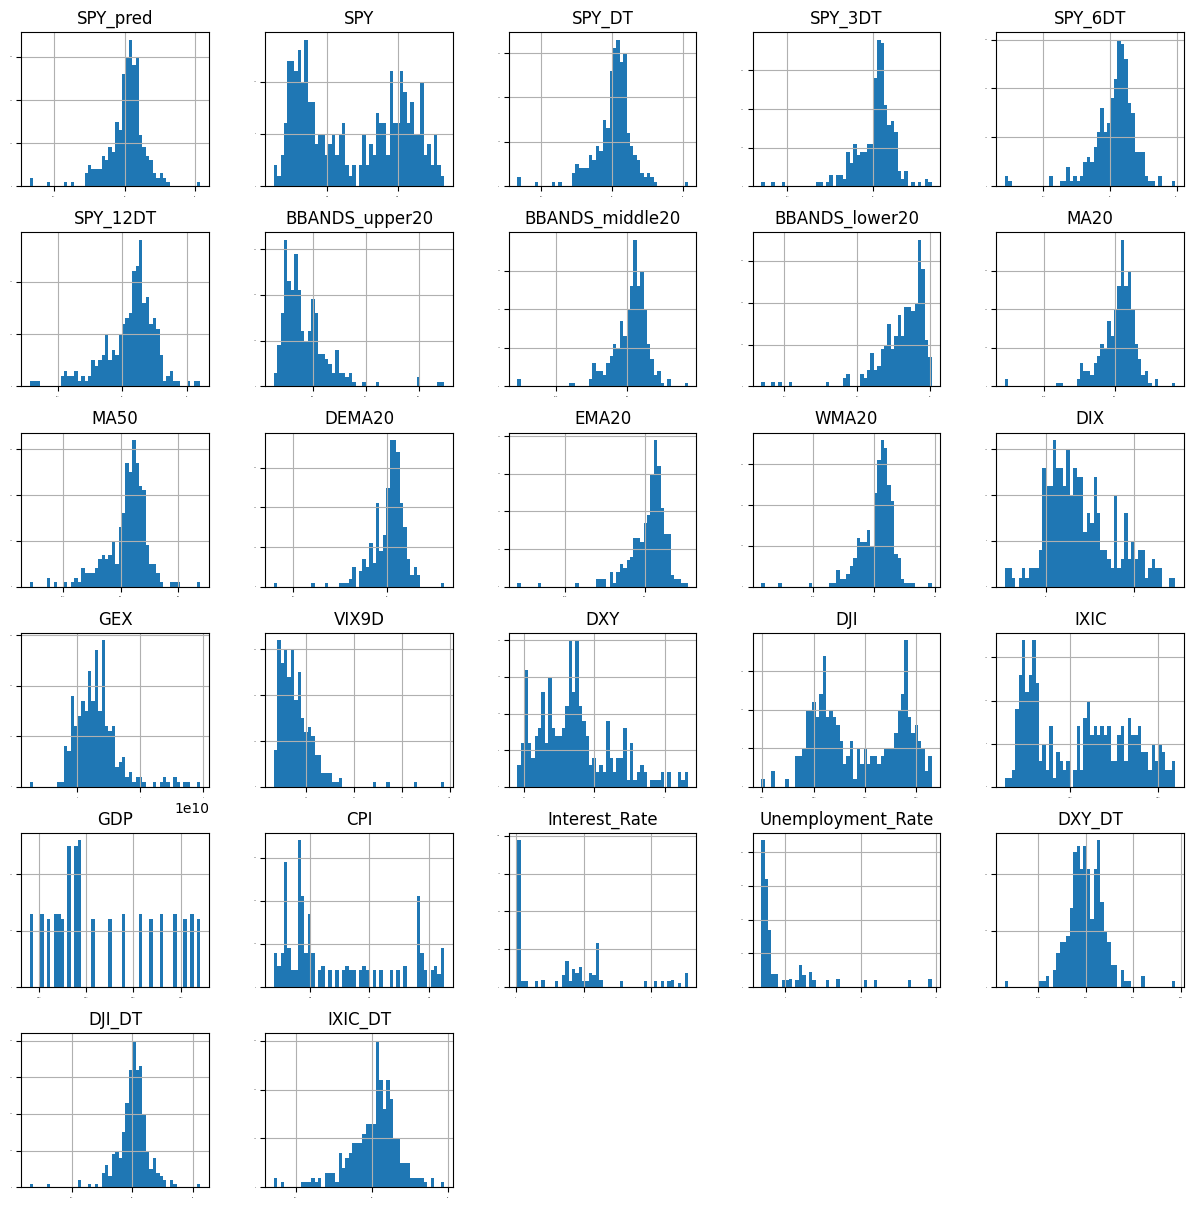

In [32]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,15))
pyplot.show()

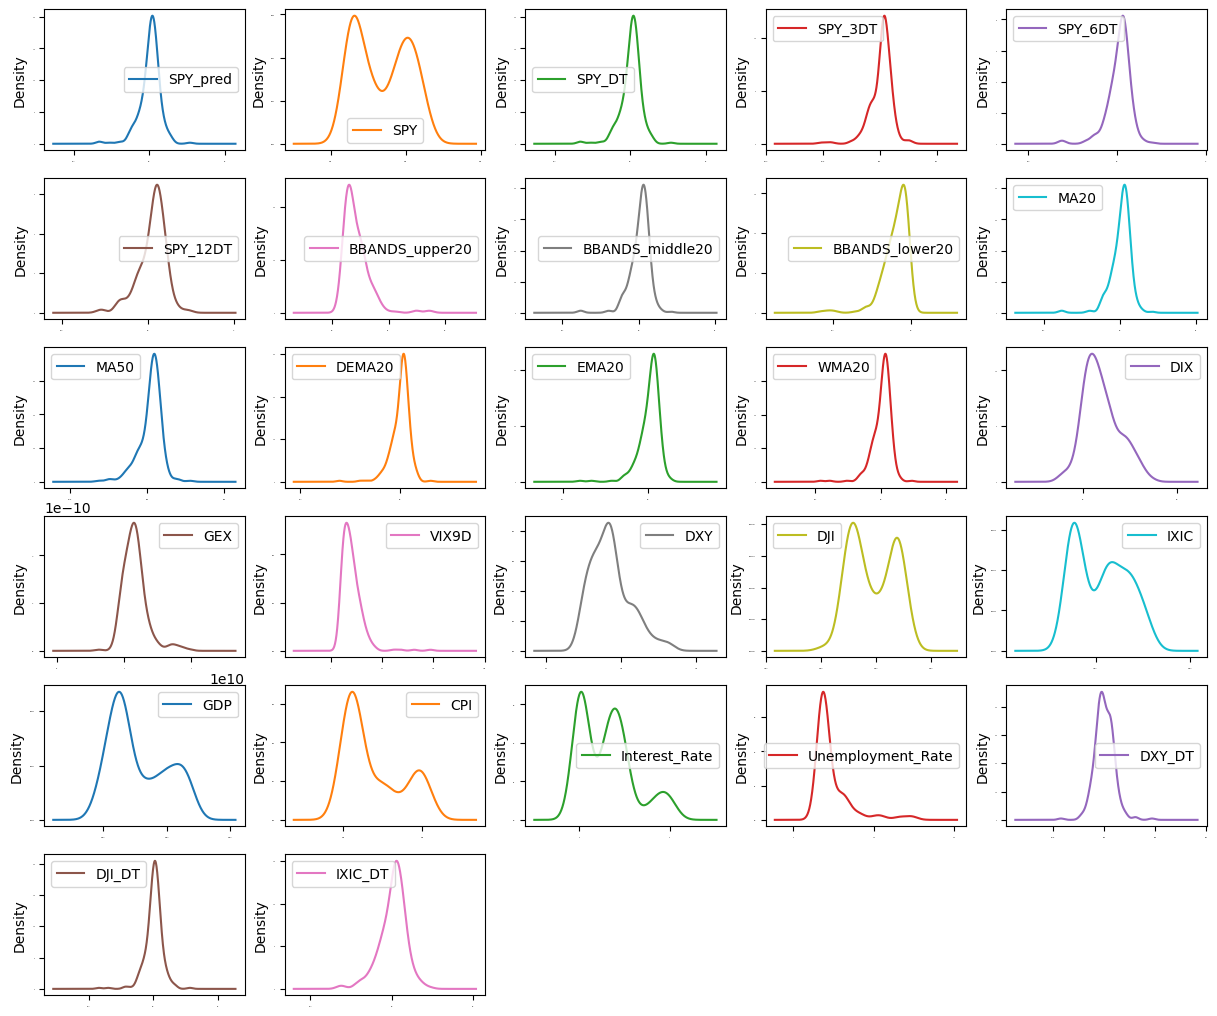

In [33]:
dataset.plot(kind='density', subplots=True, layout=(7,5), sharex=False, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

The histogram and density plot above display the distribution of each series individually. Some variables exhibit large scales, while others possess relatively small variances.

### 3.2.2 Plot time seris

In [34]:
def plot_columns_subplots(df, columns, title='Time Series', xlabel='Date', figsize=(15, 15)):
    
    n = len(columns)
    nrows = 6  # 6 rows
    ncols = 5  # 5 columns
    
    # Use default matplotlib color cycle
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True)
    
    for i, ax in enumerate(axs.ravel()):
        if i >= n:  # More axes than columns, so break and turn off those axes
            ax.axis('off')
            continue
        
        # Use color cycle
        color = colors[i % len(colors)]
        
        ax.plot(df.index, df[columns[i]], label=columns[i], color=color)
        ax.set_title(columns[i], fontsize=15)
        ax.grid(True)
        ax.legend()
    
    # Set x and y labels
    for ax in axs[-1, :]:  # x labels only on the bottom row
        ax.set_xlabel(xlabel, fontsize=15)
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.02)  # Adjust y for better title position
    plt.show()

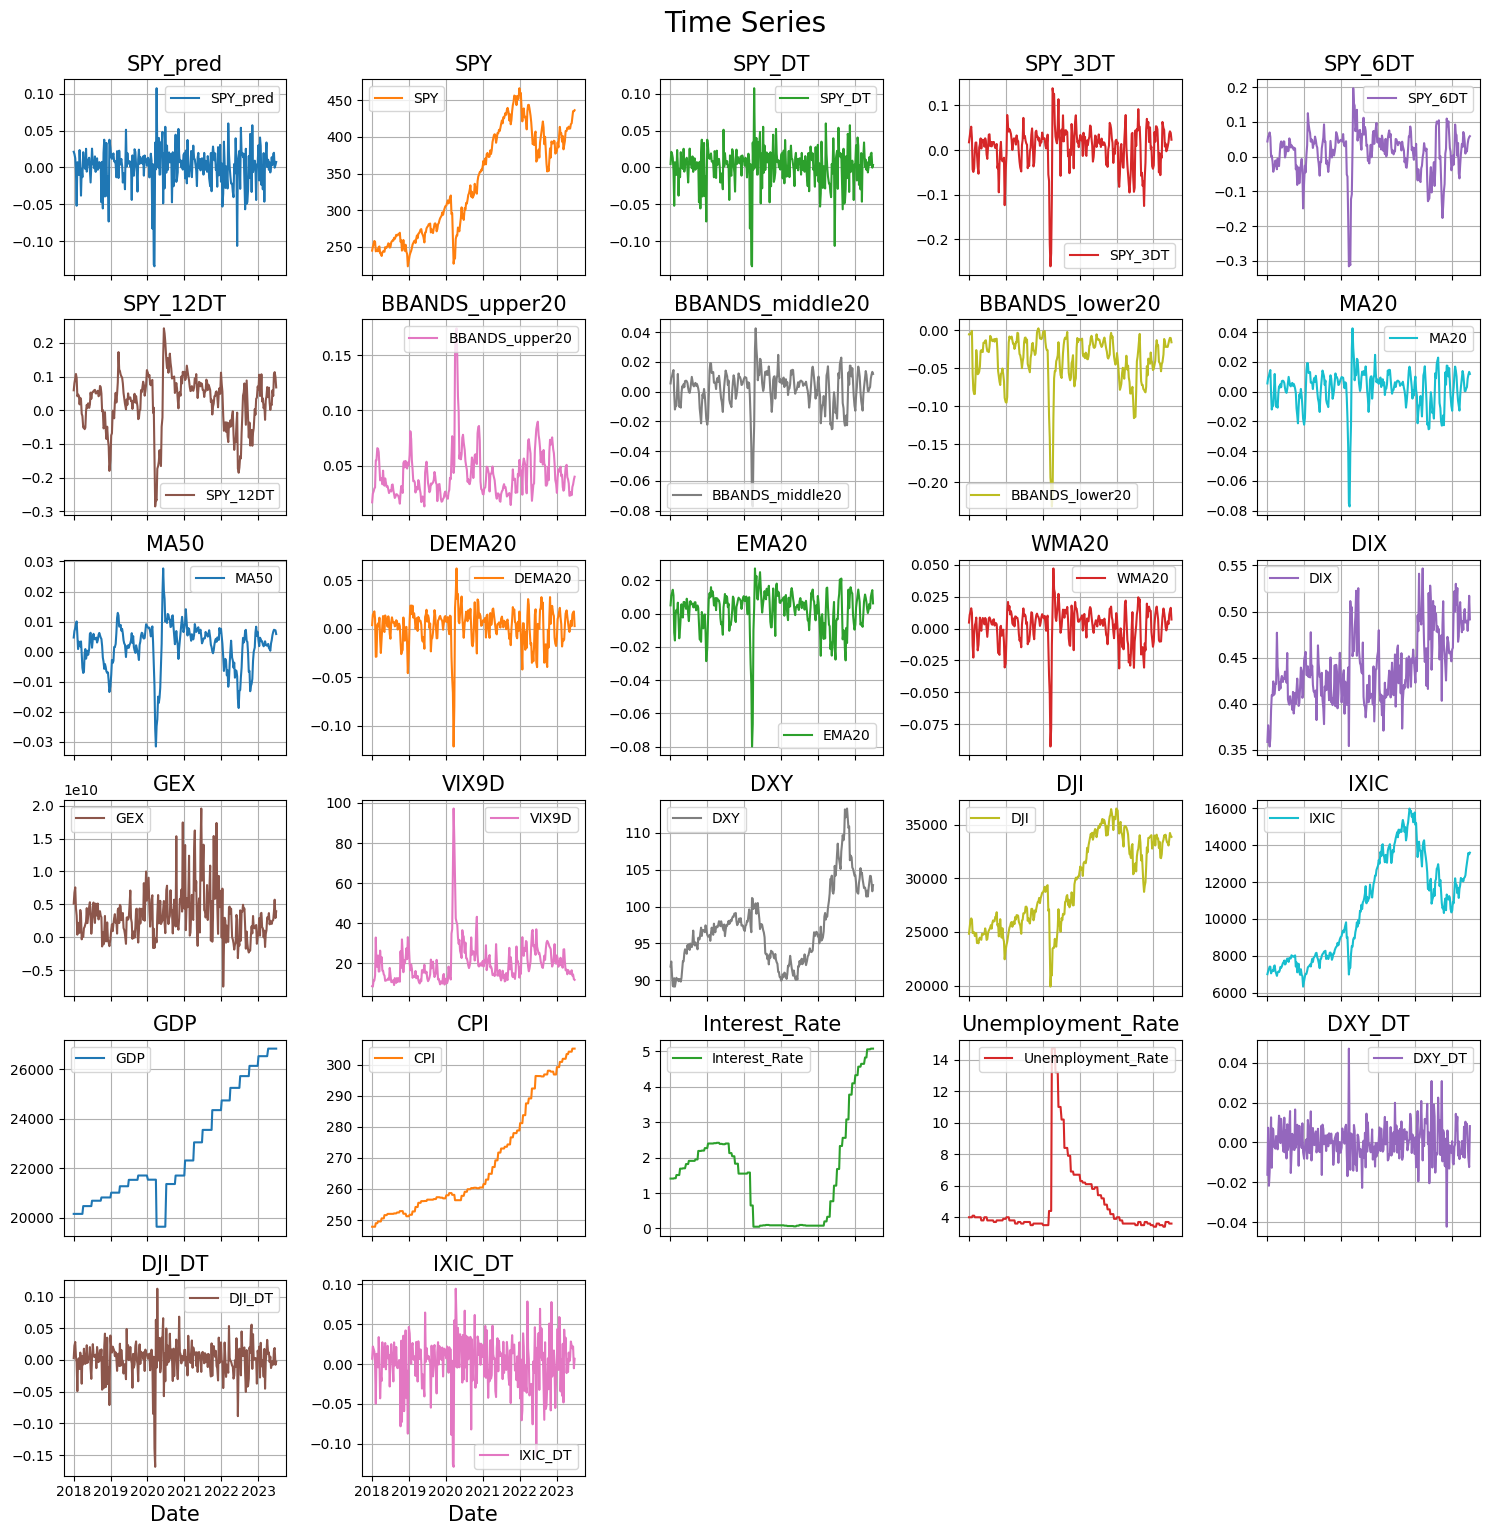

In [35]:
plot_columns_subplots(dataset, dataset.columns.tolist())

Upon examining the time series plots for each predictor alongside the predicted value, it's evident that the trends of the unemployment rate, DXY_DT, and DJI_DT closely mirror the trend of the predicted varible.

### 3.3.3 Correlation plot

In order to get a sense of the interdependence of the data we look at the scatter plot and the correlation matrix

<Axes: title={'center': 'Correlation Matrix'}>

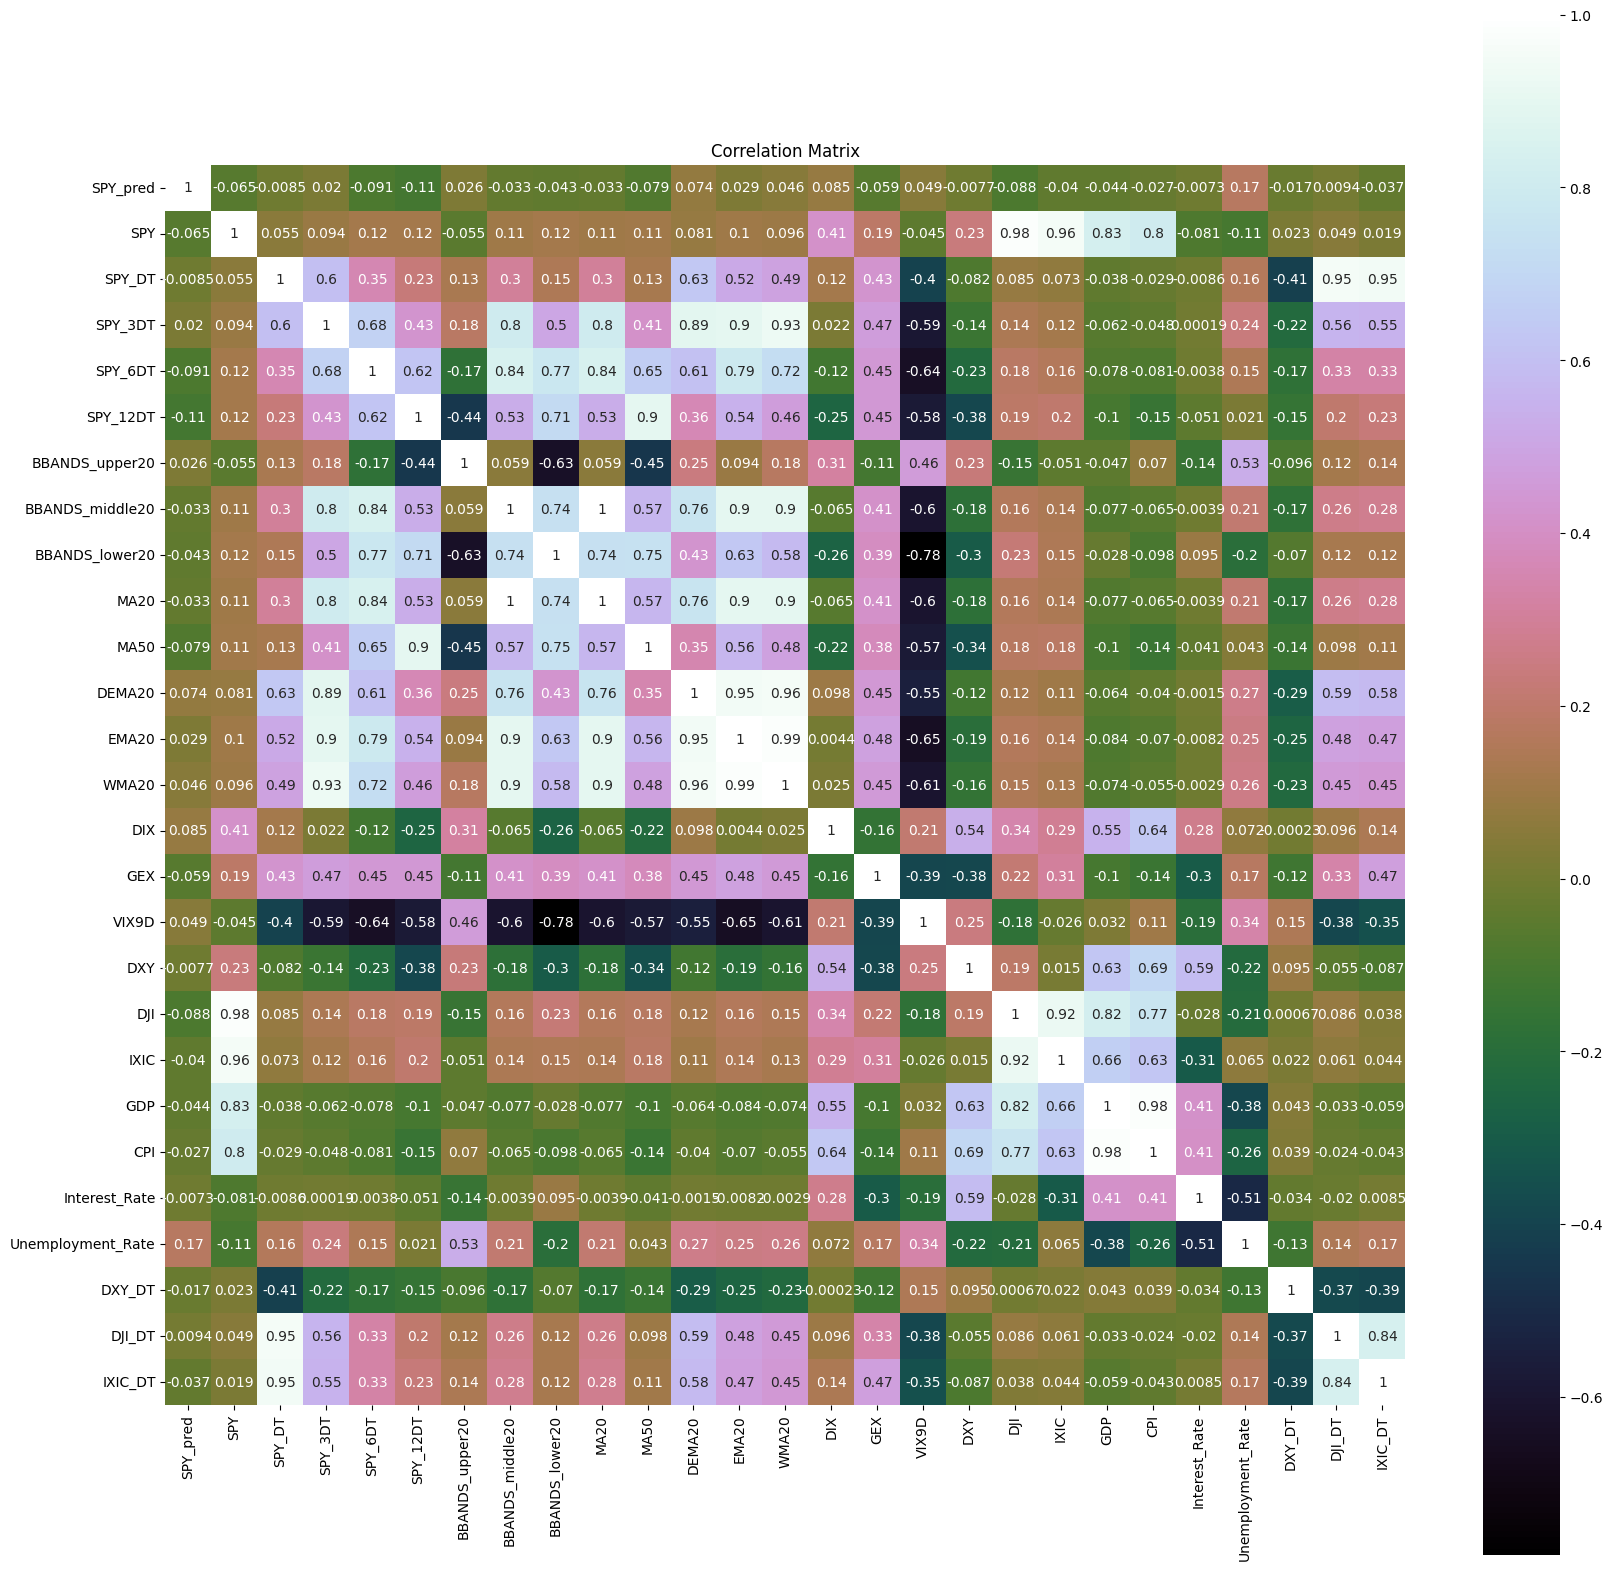

In [36]:
correlation = dataset.corr()
pyplot.figure(figsize=(20,20))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Looking at the correlation plot, we see some correlation of the predicted variable with the predictors unemployment rate, DIX and DEMA20.

<Figure size 2000x2000 with 0 Axes>

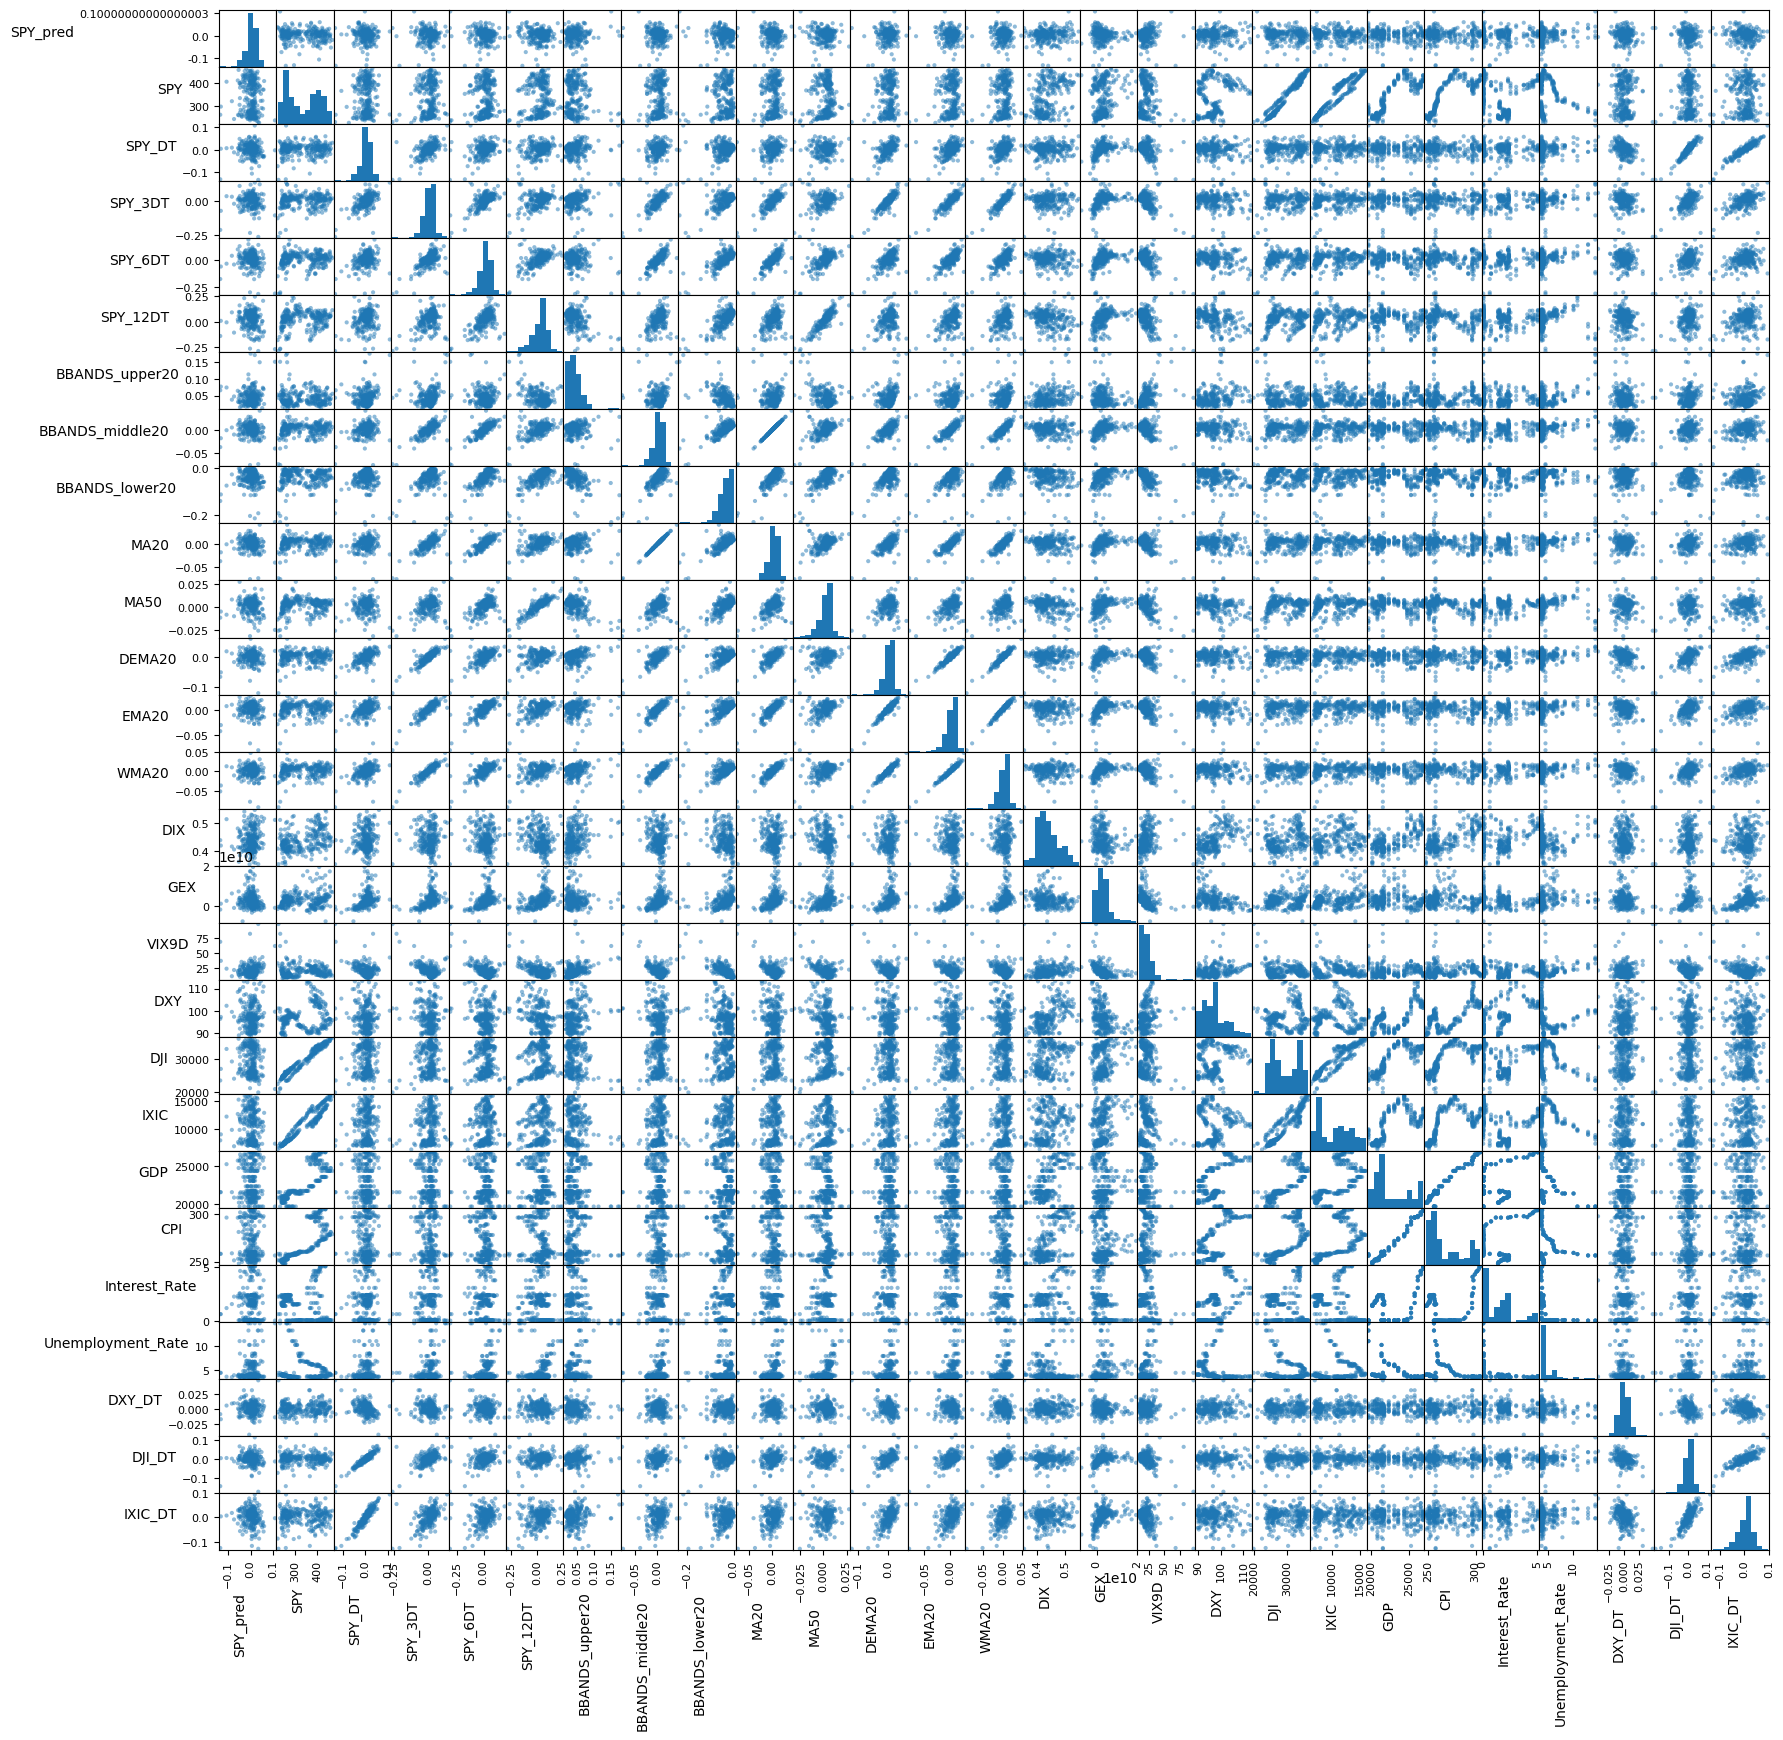

In [37]:
pyplot.figure(figsize=(20,20))
axs = scatter_matrix(dataset,figsize=(20,20))

# Rotate y-axis labels
for ax in axs[:,0]:  # For the first column of axes
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')  # Use right alignment

# Rotate x-axis labels
for ax in axs[-1,:]:  # For the last row of axes
    ax.xaxis.label.set_rotation(90)
    ax.xaxis.label.set_ha('right')  # Use right alignment

pyplot.show()

From the scatter plot presented, there appears to be a linear relationship between the predicted variable and the following predictors: unemployment rate, DIX, VIX9D, DEMA20 and WMA20

<a id='3.3'></a>
## 3.3. Time Series Analysis 

Next, we look at the seasonal decomposition of our time series

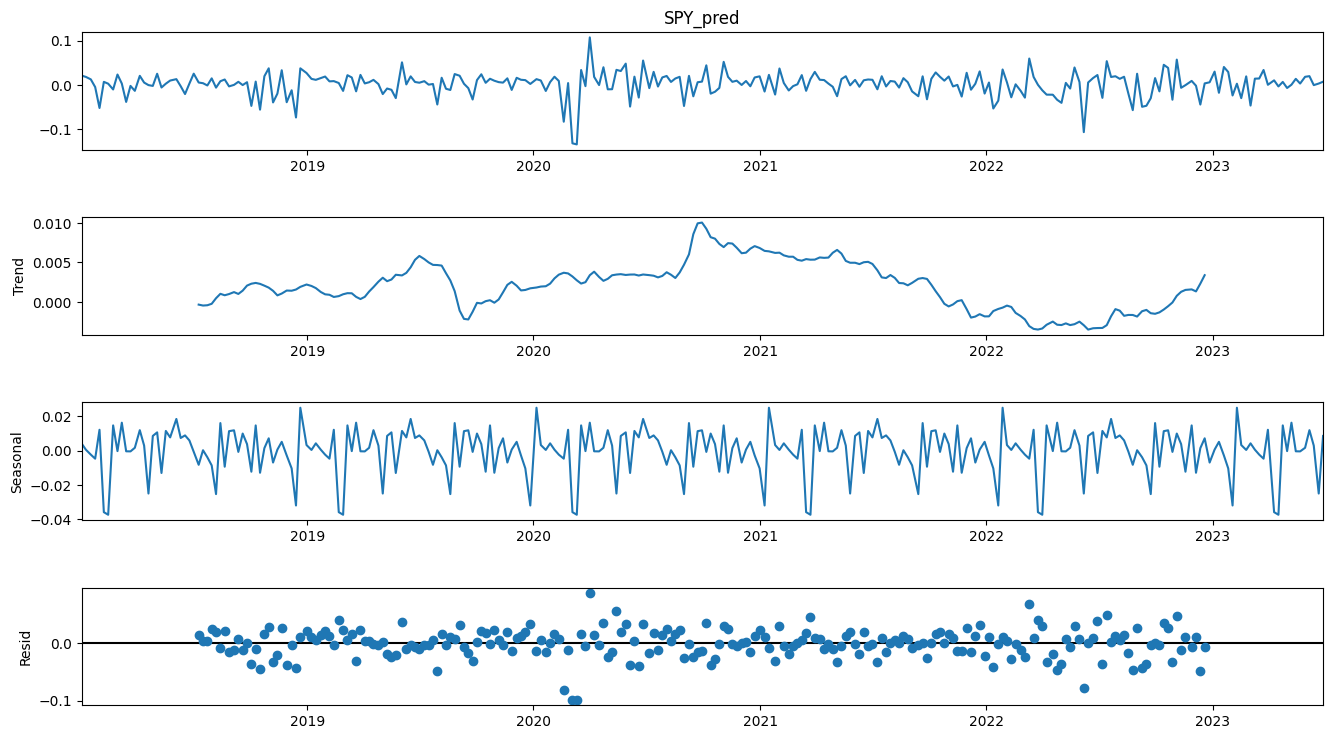

In [38]:
res = sm.tsa.seasonal_decompose(Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

Examining the decomposition plots of the predicted value, it's evident that there is a certain up and down trend for this time series. Notably, we can find the residuals have a significant influence on this time series by reviewing the y scales.

<a id='4'></a>
## 4. Data Preparation

<a id='4.1'></a>
## 4.1. Train/Validation/Test Split

In [39]:
test_size = 0.15
validation_size = 0.15 

# Calculate the actual sizes from the dataset length
test_actual_size = int(len(X) * test_size)
validation_actual_size = int(len(X) * validation_size)

# Training set ends where the validation set starts
train_size = len(X) - test_actual_size - validation_actual_size

X_train, X_temp = X[0:train_size], X[train_size:]
Y_train, Y_temp = Y[0:train_size], Y[train_size:]

X_valid, X_test = X_temp[0:validation_actual_size], X_temp[validation_actual_size:]
Y_valid, Y_test = Y_temp[0:validation_actual_size], Y_temp[validation_actual_size:]

Splitting our data in training (0.7), validation (0.15) and testing (0.15) chunks. Because we are going to implement the time series models we have to split the data in continuous series.
The data is partitioned into distinct sets to train the model, tune its parameters, and evaluate its performance on unseen data, ensuring a robust evaluation process.

<a id='4.2'></a>
## 4.2. Feature Selection

We use sklearn's SelectKBest function to get a sense of feature importance. 

In [40]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(30,'Score').set_index('Specs')  #print 10 best features

Score
Specs                      
Unemployment_Rate  8.092239
DIX                5.568359
DEMA20             2.360227
SPY_12DT           1.667926
Interest_Rate      1.558278
DXY_DT             1.473908
MA50               1.296186
SPY_6DT            1.104083
WMA20              0.940363
BBANDS_upper20     0.917303
GEX                0.804150
BBANDS_lower20     0.786162
VIX9D              0.719498
EMA20              0.712543
CPI                0.444305
IXIC_DT            0.351331
DJI                0.257218
DXY                0.201731
SPY_3DT            0.154425
IXIC               0.133542
MA20               0.097611
BBANDS_middle20    0.097611
DJI_DT             0.057413
GDP                0.047807
SPY_DT             0.010376
SPY                0.005439

We see that Unemployment_Rate, DIX seems to be the most important feature and SPY price itself being the least important.

<a id='4.3'></a>
## 4.3. Standardize Data

In [41]:
# Create a scaler object
scaler = StandardScaler()
# Fit the scaler only on the training data
X_train = scaler.fit_transform(X_train)
# Use the same scaler to transform the validation and test data
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
# assign column name
X_train = pd.DataFrame(X_train, columns=X.columns)
X_valid = pd.DataFrame(X_valid, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [42]:
X_train

SPY    SPY_DT   SPY_3DT   SPY_6DT  SPY_12DT  BBANDS_upper20  \
0   -0.986958  0.056762  0.166581  0.398281  0.269626       -0.990012   
1   -0.901559  0.689844  0.430477  0.628873  0.537993       -0.662095   
2   -0.826519  0.577256  0.740625  0.671303  0.711613       -0.578399   
3   -0.773681  0.362472  0.910852  0.809706  0.879682       -0.468225   
4   -0.792626 -0.296469  0.361650  0.597314  0.726018       -0.437429   
..        ...       ...       ...       ...       ...             ...   
190  1.906425  0.413327 -0.170241 -0.800527 -0.335719       -0.669621   
191  2.104018  0.961935  0.015805 -0.450168 -0.227358       -0.300666   
192  2.236169  0.585790  1.095427  0.072915  0.046774        0.240243   
193  2.307145  0.252290  1.005758  0.629614  0.056504       -0.149204   
194  2.447672  0.609441  0.809481  0.621998  0.200233       -0.137978   

     BBANDS_middle20  BBANDS_lower20      MA20      MA50  ...       DXY  \
0           0.187933        0.816863  0.187933  0.212657  ... -0.975615   
1           0.485273        0.811187  0.485273  0.496758  ... -0.751355   
2           0.584097        0.826632  0.584097  0.637374  ... -1.407644   
3           0.756556        0.878176  0.756556  0.800121  ... -1.846270   
4           0.878267        0.946729  0.878267  0.932923  ... -1.872654   
..               ...             ...       ...       ...  ...       ...   
190        -0.734983       -0.082556 -0.734983 -0.493209  ... -0.161024   
191        -0.292221       -0.009228 -0.292221 -0.363635  ... -0.283049   
192         0.312438        0.065527  0.312438 -0.102824  ... -0.329220   
193         0.860441        0.736087  0.860441  0.066436  ... -0.306134   
194         1.053470        0.870589  1.053470  0.155048  ... -0.250067   

          DJI      IXIC       GDP       CPI  Interest_Rate  Unemployment_Rate  \
0   -0.819248 -1.015804 -1.184646 -1.457144       0.276857          -0.514433   
1   -0.665453 -0.958337 -1.184646 -1.457144       0.276857          -0.514433   
2   -0.465650 -0.908933 -1.184646 -1.457144       0.276857          -0.514433   
3   -0.428290 -0.866101 -1.184646 -1.457144       0.276857          -0.514433   
4   -0.456413 -0.867414 -1.184646 -1.457144       0.276857          -0.514433   
..        ...       ...       ...       ...            ...                ...   
190  1.828564  1.727403  2.590109  2.486747      -1.107162          -0.321074   
191  2.037320  1.923851  2.590109  2.486747      -1.107162          -0.321074   
192  2.169419  1.999003  2.590109  2.486747      -1.107162          -0.321074   
193  2.216695  2.134419  2.590109  2.673355      -1.107162          -0.437089   
194  2.358606  2.276155  2.590109  2.673355      -1.107162          -0.437089   

       DXY_DT    DJI_DT   IXIC_DT  
0   -1.988095  0.030007  0.080132  
1    0.898436  0.728691  0.581840  
2   -2.666666  0.941834  0.468229  
3   -1.816626  0.115397  0.378453  
4   -0.114541 -0.210878 -0.154691  
..        ...       ...       ...  
190  0.659154  0.443598  0.384341  
191 -0.485946  0.710328  1.044413  
192 -0.187280  0.414813  0.302627  
193  0.086638  0.101398  0.641934  
194  0.216832  0.441174  0.658820  

[195 rows x 26 columns]

Standardizing data ensures that all features contribute equally to the model's decision process, enhances the performance of many machine learning algorithms, and simplifies the understanding and comparison of model coefficients.

<a id='5'></a>
# 5. Model Development and Training

<a id='5.1'></a>
## 5.1. Validation Options and Evaluation Metrics

In [43]:
num_folds = 10
seed = 1
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

<a id='5.2'></a>
## 5.2. Compare Models and Algorithms

<a id='5.2.1'></a>
### 5.2.1 Machine Learning models-from scikit-learn

##### Regression and Tree Regression algorithms

In [44]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

##### Neural Network algorithms

In [45]:
models.append(('MLP', MLPRegressor((60,) * 7)))

##### Ensable Models

In [46]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

##### New Models

In [47]:
import xgboost as xgb
from sklearn.linear_model import BayesianRidge

# Additional models
models.append(('XGB', xgb.XGBRegressor(objective ='reg:squarederror')))  # XGBoost
models.append(('BYS', BayesianRidge())) # Bayesian

Once we have selected all the models, we loop over each of them. First we run the K-fold analysis. Next we run the model on the entire training and validating dataset.

In [48]:
names = []
kfold_results = []
valid_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # valid results
    valid_result = mean_squared_error(res.predict(X_valid), Y_valid)
    valid_results.append(valid_result)
    
    msg = "%s: %f (%f) Train MSE: %f, Valid MSE: %f" % (name, cv_results.mean(), cv_results.std(), train_result, valid_result)
    print(msg)

LR: 0.000909 (0.001014) Train MSE: 0.000523, Valid MSE: 0.001588
LASSO: 0.000694 (0.000843) Train MSE: 0.000683, Valid MSE: 0.001021
EN: 0.000694 (0.000843) Train MSE: 0.000683, Valid MSE: 0.001021
KNN: 0.000806 (0.001034) Train MSE: 0.000527, Valid MSE: 0.001295
CART: 0.001513 (0.000968) Train MSE: 0.000000, Valid MSE: 0.005480
SVR: 0.001229 (0.000657) Train MSE: 0.001177, Valid MSE: 0.001257
MLP: 0.000907 (0.000803) Train MSE: 0.000799, Valid MSE: 0.001999
ABR: 0.000828 (0.001010) Train MSE: 0.000288, Valid MSE: 0.001218
GBR: 0.001032 (0.001143) Train MSE: 0.000035, Valid MSE: 0.001716
RFR: 0.000810 (0.000978) Train MSE: 0.000116, Valid MSE: 0.001447
ETR: 0.000857 (0.001077) Train MSE: 0.000000, Valid MSE: 0.001262
XGB: 0.000915 (0.001030) Train MSE: 0.000000, Valid MSE: 0.001458
BYS: 0.000727 (0.000928) Train MSE: 0.000600, Valid MSE: 0.001115


#### K Fold results

We being by looking at the K Fold results

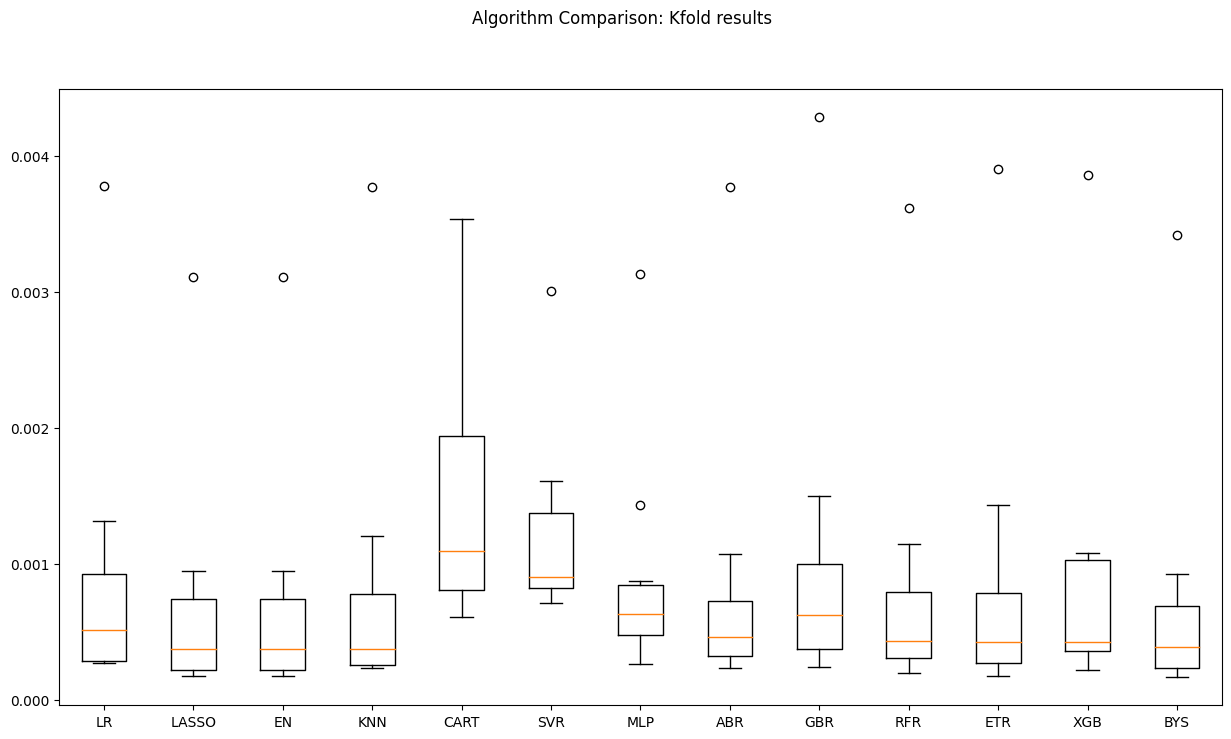

In [49]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

The results indicate that both the linear regression and the regularized regression methods, specifically Lasso regression (LASSO) and Elastic Net (EN), perform well.

#### Training and Validation error

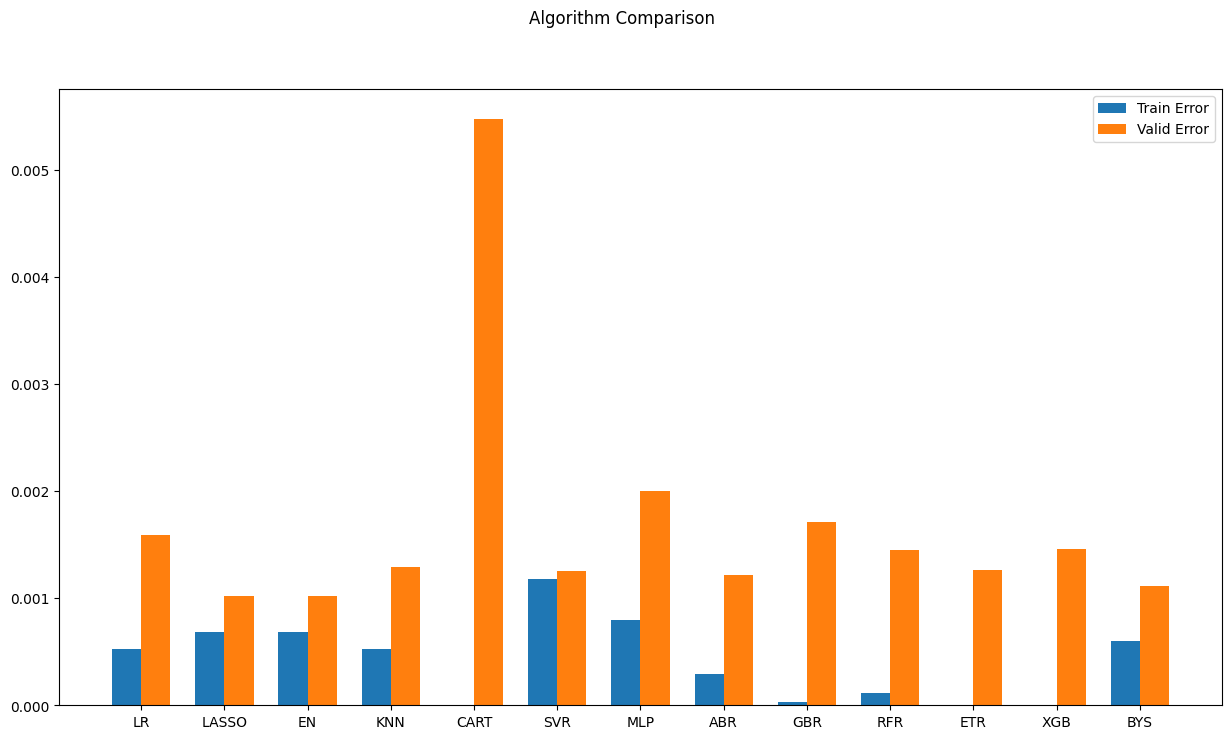

In [50]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, valid_results, width=width, label='Valid Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

- Examining the training and validation errors, the Lasso regression (LASSO) and Elastic Net (EN), AdaBoost regression (ABR) consistently demonstrate superior performance.
- Certain algorithms, like the decision tree regressor (CART), tend to overfit the training data, leading to significantly higher errors in the validation set. It would be prudent to avoid using these models.
- Ensemble models, including the gradient boosting regression (GBR), random forest regression (RFR), and Extra Trees regression (ETR), and xgboost regression (XGB) display low bias on the training set but high variance in the validation set. This results in a low error rate during training but a considerably higher error rate during validation.
- The artificial neural network, Multi-Layer Perceptron (MLP), exhibits higher errors on the validation set. This discrepancy might stem from the model being inadequately trained.

<a id='5.2.2'></a>
### 5.2.2 Time Series based models-ARIMA and LSTM

### Time Series Model - ARIMA Model

Let us first prepare the dataset for ARIMA models,
by having only the correlated varriables as exogenous variables.

In [51]:
X_train.columns

Index(['SPY', 'SPY_DT', 'SPY_3DT', 'SPY_6DT', 'SPY_12DT', 'BBANDS_upper20',
       'BBANDS_middle20', 'BBANDS_lower20', 'MA20', 'MA50', 'DEMA20', 'EMA20',
       'WMA20', 'DIX', 'GEX', 'VIX9D', 'DXY', 'DJI', 'IXIC', 'GDP', 'CPI',
       'Interest_Rate', 'Unemployment_Rate', 'DXY_DT', 'DJI_DT', 'IXIC_DT'],
      dtype='object')

In [52]:
ARIMA_cols = ['DIX', 'GEX', 'VIX9D', 'DXY', 'DJI', 'IXIC', 'GDP', 'CPI', 'Interest_Rate','Unemployment_Rate',
              'DXY_DT','DJI_DT', 'IXIC_DT']
X_train_ARIMA=X_train.loc[:, ARIMA_cols]
X_valid_ARIMA=X_valid.loc[:, ARIMA_cols]
X_test_ARIMA=X_test.loc[:, ARIMA_cols]
Y_train = Y_train.reset_index(drop=True)
tr_len = len(X_train)
te_len = len(X_valid)
to_len = len(X_train) + len(X_valid)

In [53]:
from statsmodels.tsa.arima.model import ARIMA

modelARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=[0,0,1])
model_fit = modelARIMA.fit()

In [54]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_valid_ARIMA)[1:]
error_valid_ARIMA = mean_squared_error(Y_valid, predicted)
error_valid_ARIMA

0.0029817702351433834

###  LSTM Model - sequence-to-vector

In [55]:
seq_len = 10
    
Y_train_LSTM, Y_valid_LSTM, Y_test_LSTM  = np.array(Y_train)[seq_len-1:], np.array(Y_valid), np.array(Y_test)
X_train_LSTM = np.zeros((Y_train_LSTM.shape[0], seq_len, X_train.shape[1]))
X_valid_LSTM = np.zeros((Y_valid_LSTM.shape[0], seq_len, X.shape[1]))
X_test_LSTM = np.zeros((Y_test_LSTM.shape[0], seq_len, X.shape[1]))

for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]-seq_len+i+1, :]

# For X_valid_LSTM, we'll use the last seq_len-1 samples from X_train followed by X_valid.
# This ensures that the LSTM has a consistent sequence length even for the first sample in X_valid.
X_temp = np.vstack((X_train[-(seq_len-1):], X_valid))
for i in range(seq_len):
    X_valid_LSTM[:, i, :] = X_temp[i:X_temp.shape[0]-seq_len+i+1, :]

X_temp_test = np.vstack((X_valid[-(seq_len-1):], X_test))
for i in range(seq_len):
    X_test_LSTM[:, i, :] = X_temp_test[i:X_temp_test.shape[0]-seq_len+i+1, :]

In [56]:
print('Y_train_LSTM shape:', Y_train_LSTM.shape)
print('Y_valid_LSTM shape:', Y_valid_LSTM.shape)
print('X_train_LSTM shape:', X_train_LSTM.shape)
print('X_valid_LSTM shape:', X_valid_LSTM.shape)

Y_train_LSTM shape: (186,)
Y_valid_LSTM shape: (41,)
X_train_LSTM shape: (186, 10, 26)
X_valid_LSTM shape: (41, 10, 26)


In [57]:
from keras.layers import Dropout
from keras.regularizers import L1L2
from keras.optimizers import Adam

def create_LSTM(neurons=60, learn_rate=0.01, dropout_rate=0.2, l1_reg=0.1, l2_reg=0.1):
    model = Sequential()
    
    # First LSTM layer with Dropout
    model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]),
                   kernel_regularizer=L1L2(l1=l1_reg, l2=l2_reg)))
    model.add(Dropout(dropout_rate))
    
    # Second LSTM layer with Dropout
    model.add(LSTM(neurons, return_sequences=False, kernel_regularizer=L1L2(l1=l1_reg, l2=l2_reg)))
    model.add(Dropout(dropout_rate))
    
    # Dense layer
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learn_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [58]:
LSTM_model = create_LSTM(32, learn_rate = 0.01)
LSTM_model_fit = LSTM_model.fit(X_train_LSTM, Y_train_LSTM, 
                              validation_data=(X_valid_LSTM, Y_valid_LSTM),
                                 epochs=50, batch_size=128, verbose=0, shuffle=False)

In [59]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 32)            7552      
                                                                 
 dropout (Dropout)           (None, 10, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16417 (64.13 KB)
Trainable params: 16417 (

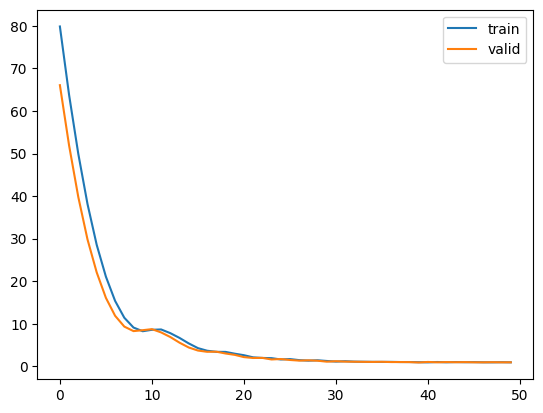

In [60]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTM_model_fit.history['loss'], label='train')
pyplot.plot(LSTM_model_fit.history['val_loss'], label='valid')
pyplot.legend()
pyplot.show()

In [61]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTM_model.predict(X_train_LSTM))
predicted = LSTM_model.predict(X_valid_LSTM)
error_valid_LSTM = mean_squared_error(Y_valid_LSTM, predicted)
print('LSTM Train MSE:', error_Training_LSTM)
print('LSTM valid MSE:', error_valid_LSTM) 

2/2 [==============================] - 0s 3ms/step
LSTM Train MSE: 0.0006935649868811677
LSTM valid MSE: 0.0010344240850876161


### LSTM Model - sequence-to-sequence
Sequence-to-sequence modeling involves predicting an entire output sequence, given an entire input sequence. This contrasts with the sequence-to-vector approach in which you're predicting a single value (or vector) given an entire input sequence.

In [62]:
def rolling_window_sequences(data, window_size):
    """Creates rolling window sequences."""
    shape = (data.shape[0] - window_size + 1, window_size) + data.shape[1:]
    strides = (data.strides[0],) + data.strides
    return np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

In [63]:
window_size = 10  

Y_train_seq2seq = rolling_window_sequences(Y_train_LSTM, window_size)
Y_valid_seq2seq = rolling_window_sequences(Y_valid_LSTM, window_size)
X_train_seq2seq = X_train_LSTM[:-window_size+1]
X_valid_seq2seq = X_valid_LSTM[:-window_size+1]

print('Y_train_seq2seq shape:', Y_train_seq2seq.shape)
print('Y_valid_seq2seq shape:', Y_valid_seq2seq.shape)
print('X_train_seq2seq shape:', X_train_seq2seq.shape)
print('X_valid_seq2seq shape:', X_valid_seq2seq.shape)

Y_train_seq2seq shape: (177, 10)
Y_valid_seq2seq shape: (32, 10)
X_train_seq2seq shape: (177, 10, 26)
X_valid_seq2seq shape: (32, 10, 26)


In [64]:
from keras.layers import RepeatVector, TimeDistributed

def create_LSTM_seq2seq(neurons=120, learn_rate=0.005):
    model= Sequential()
    
    # Encoder
    model.add(LSTM(neurons, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]), return_sequences=False))
    model.add(RepeatVector(X_train_LSTM.shape[1]))  # Set the length of the output sequence
    
    # Decoder
    model.add(LSTM(neurons, return_sequences=True))
    model.add(TimeDistributed(Dense(16, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    
    optimizer = SGD(learning_rate=learn_rate, momentum=0.5)
    model.compile(loss='mse', optimizer='adam')
    return model


In [65]:
LSTM_seq2seq_model = create_LSTM_seq2seq(32, learn_rate=0.005)
LSTM_seq2seq_fit = LSTM_seq2seq_model.fit(X_train_seq2seq, Y_train_seq2seq, 
                              validation_data=(X_valid_seq2seq, Y_valid_seq2seq),
                              epochs=50, batch_size=32, verbose=0, shuffle=False)

In [66]:
LSTM_seq2seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                7552      
                                                                 
 repeat_vector (RepeatVecto  (None, 10, 32)            0         
 r)                                                              
                                                                 
 lstm_3 (LSTM)               (None, 10, 32)            8320      
                                                                 
 time_distributed (TimeDist  (None, 10, 16)            528       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 1)             17        
 stributed)                                                      
                                                      

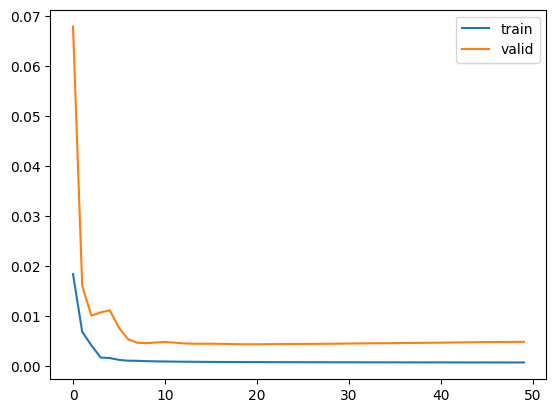

In [67]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTM_seq2seq_fit.history['loss'], label='train')
pyplot.plot(LSTM_seq2seq_fit.history['val_loss'], label='valid')
pyplot.legend()
pyplot.show()

In [68]:
# Flatten the data to compute the MSE
Y_train_seq2seq_flat = Y_train_seq2seq.reshape(-1, 1)
predicted_seq2seq_flat = LSTM_seq2seq_model.predict(X_train_seq2seq).reshape(-1, 1)

error_Training_LSTM_seq2seq = mean_squared_error(Y_train_seq2seq_flat, predicted_seq2seq_flat)

# For the valid set
Y_valid_seq2seq_flat = Y_valid_seq2seq.reshape(-1, 1)
predicted_valid_seq2seq_flat = LSTM_seq2seq_model.predict(X_valid_seq2seq).reshape(-1, 1)

error_valid_LSTM_seq2seq = mean_squared_error(Y_valid_seq2seq_flat, predicted_valid_seq2seq_flat)

print('LSTM Training sequence-to-sequence MSE:', error_Training_LSTM_seq2seq)
print('LSTM Validating sequence-to-sequence MSE:', error_valid_LSTM_seq2seq)

1/1 [==============================] - 0s 16ms/step
LSTM Training sequence-to-sequence MSE: 0.0006610019433062807
LSTM Validating sequence-to-sequence MSE: 0.004798286888546303


#### Append to previous results

In [69]:
valid_results.append(error_valid_ARIMA)
valid_results.append(error_valid_LSTM)
valid_results.append(error_valid_LSTM_seq2seq)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)
train_results.append(error_Training_LSTM_seq2seq)

names.append("ARIMA")
names.append("LSTM")
names.append("LSTMseq2seq")

## Overall Comparison of all the algorithms ( including Time Series Algorithms)

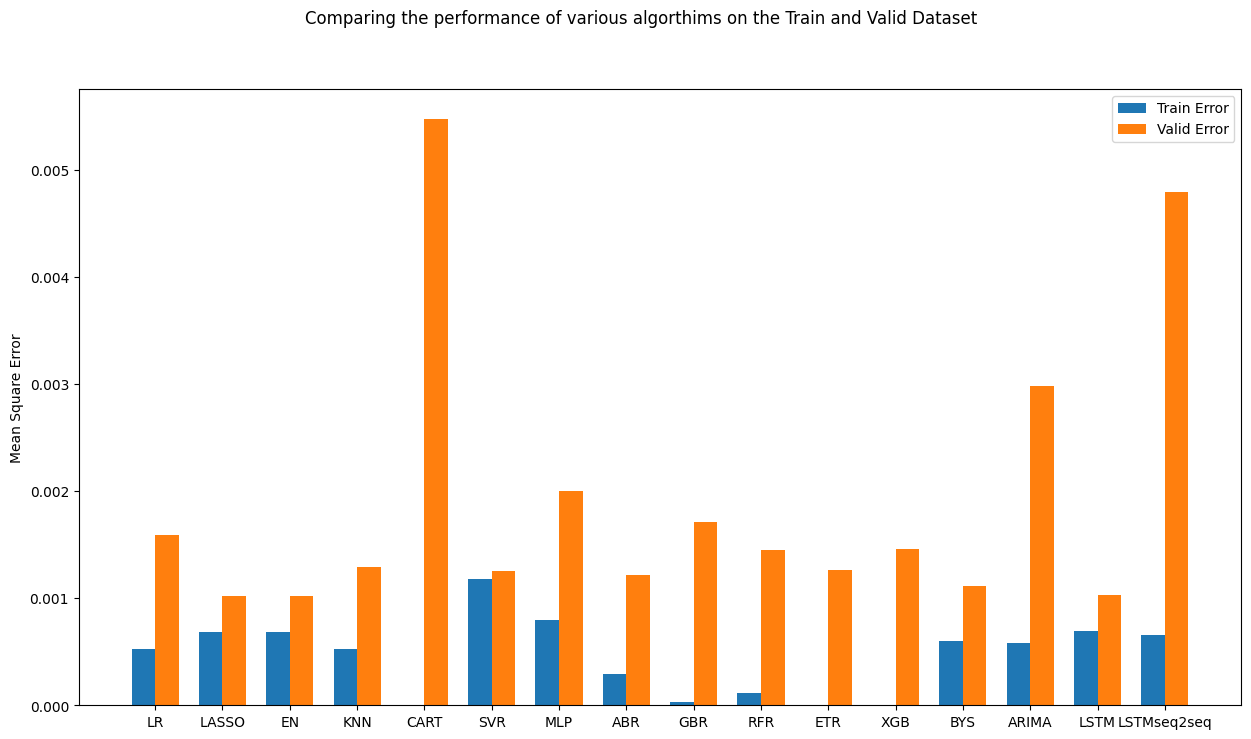

In [70]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Valid Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, valid_results, width=width, label='Valid Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

- From the chart presented, it's evident that the time series-based LSTM model stands shoulder-to-shoulder with linear supervised-regression models, such as Lasso Regression (LASSO) and Elastic Net (EN). This is likely attributed to the pronounced linear relationship we previously discussed. At the same time, SVR, ABR, BYS all have good performance.
- Both the ARIMA and LSTM sequence-to-sequence models, however, don't deliver as well in performance.
- Given these observations, our choice leans towards the LASSO, EN and ABR models for further tuning.
- Additionally, I'll explore refining the ARIMA and LSTM models, as extended training and fine-tuning might enhance their performance.

<a id='6'></a>
# 6. Model Tuning and Grid Search

Based on the chart above, the LASSO, EN and ABR models performs good. Consequently, we will focus on tuning these models. 

To enhance the effectiveness of the ARIMA and LSTM models, we'll also undertake a detailed search for optimal parameters and hyperparameters.

<a id='6.1'></a>
## 6.1 Grid Search for LASSO Model
Change alpha value and check for the best validation result

In [71]:
# Evaluate a LASSO model for a given alpha
def evaluate_lasso_model(alpha):
    model = Lasso(alpha=alpha)
    model.fit(X_train, Y_train)  # Train on the training set
    predictions = model.predict(X_valid)  # Predict on the validation set
    error = mean_squared_error(Y_valid, predictions)
    return error

# Evaluate combinations of alpha values for the LASSO model
def evaluate_models(alpha_values):
    best_score, best_alpha = float("inf"), None
    for alpha in alpha_values:
        try:
            mse = evaluate_lasso_model(alpha)
            if mse < best_score:
                best_score = mse
                best_alpha = alpha
            print('LASSO Alpha=%.5f | Validation MSE=%.7f' % (alpha, mse))
        except:
            continue
    print('-'*100)       
    print('Best LASSO Alpha=%.5f | Validation MSE=%.7f' % (best_alpha, best_score))
    return best_alpha 

# Evaluate a range of alpha values
alpha_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
LASSO_best_alpha = evaluate_models(alpha_values)

LASSO Alpha=0.00001 | Validation MSE=0.0014923
LASSO Alpha=0.00010 | Validation MSE=0.0011094
LASSO Alpha=0.00100 | Validation MSE=0.0010287
LASSO Alpha=0.01000 | Validation MSE=0.0010208
LASSO Alpha=0.10000 | Validation MSE=0.0010208
LASSO Alpha=1.00000 | Validation MSE=0.0010208
----------------------------------------------------------------------------------------------------
Best LASSO Alpha=0.01000 | Validation MSE=0.0010208


<a id='6.2'></a>
## 6.2 Grid Search for EN Model
Change Alpha and l1_ratio and check for the best validation result

In [72]:
# Evaluate an ElasticNet model for given parameters
def evaluate_en_model(alpha, l1_ratio):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_valid)  # Predict on the validation set
    error = mean_squared_error(Y_valid, predictions)
    return error

# Evaluate combinations of parameters for the ElasticNet model
def evaluate_models(alpha_values, l1_ratio_values):
    best_score, best_params = float("inf"), None
    for alpha in alpha_values:
        for l1_ratio in l1_ratio_values:
            try:
                mse = evaluate_en_model(alpha, l1_ratio)
                if mse < best_score:
                    best_score = mse
                    best_params = (alpha, l1_ratio)
                print('ElasticNet Alpha=%.5f, l1_ratio=%.2f | Validation MSE=%.7f' 
                      % (alpha, l1_ratio, mse))
            except:
                continue
    print('-'*100)
    print('Best ElasticNet Alpha=%.5f, l1_ratio=%.2f | Validation MSE=%.7f' 
          % (best_params[0], best_params[1], best_score))
    return best_params

# Evaluate a range of parameters
alpha_values = [1e-5, 1e-4, 1e-3]
l1_ratio_values = [0.3, 0.5, 0.7]

EN_best_params = evaluate_models(alpha_values, l1_ratio_values)

ElasticNet Alpha=0.00001, l1_ratio=0.30 | Validation MSE=0.0015909
ElasticNet Alpha=0.00001, l1_ratio=0.50 | Validation MSE=0.0015621
ElasticNet Alpha=0.00001, l1_ratio=0.70 | Validation MSE=0.0015337
ElasticNet Alpha=0.00010, l1_ratio=0.30 | Validation MSE=0.0012989
ElasticNet Alpha=0.00010, l1_ratio=0.50 | Validation MSE=0.0012359
ElasticNet Alpha=0.00010, l1_ratio=0.70 | Validation MSE=0.0011874
ElasticNet Alpha=0.00100, l1_ratio=0.30 | Validation MSE=0.0010316
ElasticNet Alpha=0.00100, l1_ratio=0.50 | Validation MSE=0.0010300
ElasticNet Alpha=0.00100, l1_ratio=0.70 | Validation MSE=0.0010266
----------------------------------------------------------------------------------------------------
Best ElasticNet Alpha=0.00100, l1_ratio=0.70 | Validation MSE=0.0010266


<a id='6.3'></a>
## 6.3 Grid Search for ABR Model
Change n_estimators, learning_rate and loss_values and check for the best validation result

In [73]:
# Evaluate an AdaBoostRegressor model for given parameters
def evaluate_abr_model(n_estimators, learning_rate, loss):
    model = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, loss=loss, random_state=0)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_valid)  # Predict on the validation set
    error = mean_squared_error(Y_valid, predictions)
    return error

# Evaluate combinations of parameters for the AdaBoostRegressor model
def evaluate_models(n_estimators_values, learning_rate_values, loss_values):
    best_score, best_params = float("inf"), None
    for n_estimators in n_estimators_values:
        for learning_rate in learning_rate_values:
            for loss in loss_values:
                try:
                    mse = evaluate_abr_model(n_estimators, learning_rate, loss)
                    if mse < best_score:
                        best_score = mse
                        best_params = (n_estimators, learning_rate, loss)
                    print('ABR n_estimators=%d, learning_rate=%.2f, loss=%s | Validation MSE=%.7f' 
                          % (n_estimators, learning_rate, loss, mse))
                except:
                    continue
    print('-'*100)                
    print('Best ABR n_estimators=%d, learning_rate=%.2f, loss=%s | Validation MSE=%.7f' 
          % (best_params[0], best_params[1], best_params[2], best_score))
    return best_params

# Evaluate a range of parameters
n_estimators_values = [10, 50, 100]
learning_rate_values = [0.1, 0.5, 1.0]
loss_values = ['linear', 'square', 'exponential']

ABR_best_params = evaluate_models(n_estimators_values, learning_rate_values, loss_values)

ABR n_estimators=10, learning_rate=0.10, loss=linear | Validation MSE=0.0010395
ABR n_estimators=10, learning_rate=0.10, loss=square | Validation MSE=0.0010209
ABR n_estimators=10, learning_rate=0.10, loss=exponential | Validation MSE=0.0010142
ABR n_estimators=10, learning_rate=0.50, loss=linear | Validation MSE=0.0017776
ABR n_estimators=10, learning_rate=0.50, loss=square | Validation MSE=0.0010371
ABR n_estimators=10, learning_rate=0.50, loss=exponential | Validation MSE=0.0010074
ABR n_estimators=10, learning_rate=1.00, loss=linear | Validation MSE=0.0012162
ABR n_estimators=10, learning_rate=1.00, loss=square | Validation MSE=0.0014166
ABR n_estimators=10, learning_rate=1.00, loss=exponential | Validation MSE=0.0012974
ABR n_estimators=50, learning_rate=0.10, loss=linear | Validation MSE=0.0010439
ABR n_estimators=50, learning_rate=0.10, loss=square | Validation MSE=0.0010021
ABR n_estimators=50, learning_rate=0.10, loss=exponential | Validation MSE=0.0010530
ABR n_estimators=50,

<a id='6.4'></a>
## 6.4 Grid Search for ARIMA Model
Perform a grid search with different combination p,d and q in the ARIMA model's order and check for the best validation result

In [74]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(arima_order):
    modelARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=arima_order)
    model_fit = modelARIMA.fit()
    
    # Make predictions on the validation set
    start_index = len(Y_train)
    end_index = start_index + len(Y_valid) - 1
    predictions = model_fit.predict(start=start_index, end=end_index, exog = X_valid_ARIMA)
    
    error = mean_squared_error(Y_valid, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s | Validation MSE=%.7f' % (order,mse))
                except:
                    continue
    print('-'*100)
    print('Best ARIMA%s | Validation MSE=%.7f' % (best_cfg, best_score))
    return best_cfg  # Return the best configuration

# evaluate parameters
p_values = [0, 1, 2, 3]
d_values = range(0, 2)
q_values = range(0, 2)
best_arima_parameters = evaluate_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) | Validation MSE=0.0029792
ARIMA(0, 0, 1) | Validation MSE=0.0029818
ARIMA(0, 1, 0) | Validation MSE=0.1314572
ARIMA(0, 1, 1) | Validation MSE=0.1195159
ARIMA(1, 0, 0) | Validation MSE=0.0044885
ARIMA(1, 0, 1) | Validation MSE=0.0029797
ARIMA(1, 1, 0) | Validation MSE=0.1153597
ARIMA(1, 1, 1) | Validation MSE=0.1162708
ARIMA(2, 0, 0) | Validation MSE=0.0040169
ARIMA(2, 0, 1) | Validation MSE=0.0029797
ARIMA(2, 1, 0) | Validation MSE=0.1275029
ARIMA(2, 1, 1) | Validation MSE=0.1110929
ARIMA(3, 0, 0) | Validation MSE=0.0024591
ARIMA(3, 0, 1) | Validation MSE=0.0024741
ARIMA(3, 1, 0) | Validation MSE=0.1162519
ARIMA(3, 1, 1) | Validation MSE=0.1127465
----------------------------------------------------------------------------------------------------
Best ARIMA(3, 0, 0) | Validation MSE=0.0024591


<a id='6.5'></a>
## 6.5 Tune hyperparameters for LSTM Model
Change number of neurons, learn_rates and batch_size and check for the best validation result 

In [75]:
# Define ranges for hyperparameters
neurons_range = [8, 16, 32]
learn_rate_range = [0.0001, 0.001]
batch_size_range = [16, 32] 

best_model = None
best_score = float('inf')  # assuming lower scores (e.g., MSE) are better

# To store scores for each model
scores = []

# Loop over hyperparameters
for neurons in neurons_range:
    for learn_rate in learn_rate_range:
        for batch_size in batch_size_range:
            #print(f"Training model with neurons={neurons}, learn_rate={learn_rate}, batch_size={batch_size}")
            model = create_LSTM(neurons, learn_rate)  # Fixed momentum at 0.5
            history = model.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_valid_LSTM, Y_valid_LSTM), 
                                epochs=50, batch_size=batch_size, verbose=0, shuffle=False)
            
            # Get validation loss for current model
            val_loss = history.history['val_loss'][-1]
            scores.append(({'neurons': neurons, 'learn_rate': learn_rate, 'batch_size': batch_size}, val_loss))
            
            if val_loss < best_score:
                best_score = val_loss
                best_model = model
                best_params = {'neurons': neurons, 'learn_rate': learn_rate, 'batch_size': batch_size}

print("Scores for Each Model:")
for params, score in scores:
    print(f"Parameters: {params}, Score: {score}")

print("\nBest Model Parameters:", best_params)
print("Best Validation Score:", best_score)

Scores for Each Model:
Parameters: {'neurons': 8, 'learn_rate': 0.0001, 'batch_size': 16}, Score: 14.644122123718262
Parameters: {'neurons': 8, 'learn_rate': 0.0001, 'batch_size': 32}, Score: 18.730987548828125
Parameters: {'neurons': 8, 'learn_rate': 0.001, 'batch_size': 16}, Score: 0.014633332379162312
Parameters: {'neurons': 8, 'learn_rate': 0.001, 'batch_size': 32}, Score: 0.8600599765777588
Parameters: {'neurons': 16, 'learn_rate': 0.0001, 'batch_size': 16}, Score: 23.89177894592285
Parameters: {'neurons': 16, 'learn_rate': 0.0001, 'batch_size': 32}, Score: 31.868741989135742
Parameters: {'neurons': 16, 'learn_rate': 0.001, 'batch_size': 16}, Score: 0.034717898815870285
Parameters: {'neurons': 16, 'learn_rate': 0.001, 'batch_size': 32}, Score: 0.048368941992521286
Parameters: {'neurons': 32, 'learn_rate': 0.0001, 'batch_size': 16}, Score: 38.768341064453125
Parameters: {'neurons': 32, 'learn_rate': 0.0001, 'batch_size': 32}, Score: 58.3623046875
Parameters: {'neurons': 32, 'learn_

The MSE of the LSTM model is much larger than other models, so we will exclude the LSTM model in the discussion below.

<a id='7'></a>
# 7. Model Testing

Now that we've identified the optimal parameters for each model, we can evaluate their performance on the test set.

<a id='7.1'></a>
## 7.1 Testing results

In [76]:
# Testing LASSO
lasso_model = Lasso(alpha = LASSO_best_alpha)
lasso_model.fit(X_train, Y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(lasso_predictions, Y_test)
print(f"LASSO test result: {lasso_mse}")

# Testing ElasticNet
en_model = ElasticNet(alpha = EN_best_params[0], l1_ratio = EN_best_params[1])
en_model.fit(X_train, Y_train)
en_predictions = en_model.predict(X_test)
en_mse = mean_squared_error(en_predictions, Y_test)
print(f"ElasticNet test result: {en_mse}")

# Testing AdaBoostRegressor
abr_model = AdaBoostRegressor(n_estimators=ABR_best_params[0], learning_rate=ABR_best_params[1], 
                              loss=ABR_best_params[2], random_state=0)
abr_model.fit(X_train, Y_train)
abr_predictions = abr_model.predict(X_test)
abr_mse = mean_squared_error(abr_predictions, Y_test)
print(f"AdaBoostRegressor test result: {abr_mse}")

# Testing ARIMA
ARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA, order=list(best_arima_parameters))
ARIMA_tuned_fit = ARIMA_tuned.fit()
ARIMA_predictions = ARIMA_tuned_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
ARIMA_mse = mean_squared_error(ARIMA_predictions, Y_test)
print(f"ARIMA test result: {ARIMA_mse}")

LASSO test result: 0.0006406198722312419
ElasticNet test result: 0.0005917578784441305
AdaBoostRegressor test result: 0.0006953184131143966
ARIMA test result: 0.005650344082841739


In the test dataset, ARIMA's MSE are obviously larger than other models. So we will exclude ARIMA in the discussion below.

<a id='7.2'></a>
## 7.2 MSE as the criterion?

In Section 6.1, we see that the LASSO model with alpha = 0.01 has the smallest MSE.

Then in the previous section, we see that the LASSO model has MSE = 0.0006 in the test data set. So, you might think that the LASSO model with alpha=0.01 is a good model.

**However, it is not.**

Let's print out the predictions for the test set:

In [77]:
lasso_predictions

array([0.00317542, 0.00317542, 0.00317542, 0.00317542, 0.00317542,
       0.00317542, 0.00317542, 0.00317542, 0.00317542, 0.00317542,
       0.00317542, 0.00317542, 0.00317542, 0.00317542, 0.00317542,
       0.00317542, 0.00317542, 0.00317542, 0.00317542, 0.00317542,
       0.00317542, 0.00317542, 0.00317542, 0.00317542, 0.00317542,
       0.00317542, 0.00317542, 0.00317542, 0.00317542, 0.00317542,
       0.00317542, 0.00317542, 0.00317542, 0.00317542, 0.00317542,
       0.00317542, 0.00317542, 0.00317542, 0.00317542, 0.00317542,
       0.00317542])

It is surprising to see that this model predicts the **same return on every day in the test set**.

Let's check another alpha, e.g., alpha = 0.00001

In [78]:
lasso_model_00001 = Lasso(alpha = 0.00001)
lasso_model_00001.fit(X_train, Y_train)
lasso_predictions_00001 = lasso_model_00001.predict(X_test)
lasso_predictions_00001

array([ 0.015583  ,  0.05150753,  0.05188603,  0.04666604,  0.07173364,
        0.05538241,  0.03506815,  0.02909935,  0.02546886, -0.01965351,
        0.02724906,  0.0209813 ,  0.01458519,  0.01026588,  0.03334594,
        0.04059619,  0.04880228,  0.03322157,  0.05052917,  0.04103758,
        0.03455374,  0.04619127,  0.04811649,  0.05553307,  0.03053356,
        0.05749024,  0.04588936,  0.05904274,  0.04591741,  0.0546277 ,
        0.0549303 ,  0.05037438,  0.04854137,  0.05067654,  0.06648952,
        0.06425282,  0.05461969,  0.05613406,  0.04986534,  0.05803157,
        0.0501525 ])

This time, the predictions are different on each day, however, there is only one negative prediction, making this model almost same as buy-and-hold strategy.

This is a very good example that shows the MSE might not be a good criterion for evaluating financial models.

For trading strategies, we want to maximize our return or Sharpe ratio. Minimizing the MSE does not always guarantee a large return or Sharpe ratio.

In the discussion below, we will exclude the LASSO model and focus on the Elastic Net model and the AdaBoost model.

<a id='8'></a>
# 8. Model Evaluation

<a id='8.1'></a>
## 8.1 Evaluate by Sharpe ratio and CAGR

We are going to build the equity curve for the EN model and the ABR model.

Basically, if the model predicts positive returns, then we will hold the position and earn its returns.

If the model predicts negative returns, then we will clear our position and hold cash, and the return for such periods are 0.

In [79]:
df_equity = np.exp(Y_test).to_frame()
df_equity['en_pred'] = np.exp(en_predictions)
df_equity['en_curve'] = df_equity['SPY_pred'][df_equity['en_pred'] >=1]

df_equity['abr_pred'] = np.exp(abr_predictions)
df_equity['abr_curve'] = df_equity['SPY_pred'][df_equity['abr_pred'] >=1]

df_equity = df_equity.fillna(1)
df_equity['SPY_pct_return'] = df_equity['SPY_pred'] - 1
df_equity['en_pct_return'] = df_equity['en_curve'] - 1
df_equity['abr_pct_return'] = df_equity['abr_curve'] - 1
df_equity.head()

SPY_pred   en_pred  en_curve  abr_pred  abr_curve  SPY_pct_return  \
Date                                                                            
2022-09-09  0.952149  0.987955  1.000000  1.000792   0.952149       -0.047851   
2022-09-16  0.954326  1.009517  0.954326  1.021585   0.954326       -0.045674   
2022-09-23  0.970730  1.011751  0.970730  1.002086   0.970730       -0.029270   
2022-09-30  1.015706  1.005589  1.015706  1.008165   1.015706        0.015706   
2022-10-07  0.985777  1.017770  0.985777  1.007778   0.985777       -0.014223   

            en_pct_return  abr_pct_return  
Date                                       
2022-09-09       0.000000       -0.047851  
2022-09-16      -0.045674       -0.045674  
2022-09-23      -0.029270       -0.029270  
2022-09-30       0.015706        0.015706  
2022-10-07      -0.014223       -0.014223

In order to calculate the Sharpe ratios, let's assume an average 4% risk-free rate for the test period.

In [80]:
risk_free = 0.04/(252/return_period)

In [81]:
sharpe_SPY = (df_equity['SPY_pct_return'].mean() - risk_free) / df_equity['SPY_pct_return'].std() * np.sqrt(252/return_period)
print('The sharpe ratio of the SPY:', round(sharpe_SPY,2))

sharpe_en = (df_equity['en_pct_return'].mean() - risk_free) / df_equity['en_pct_return'].std() * np.sqrt(252/return_period)
print('The sharpe ratio of the ElasticNet model:', round(sharpe_en,2))

sharpe_abr = (df_equity['abr_pct_return'].mean() - risk_free) / df_equity['abr_pct_return'].std() * np.sqrt(252/return_period)
print('The sharpe ratio of the AdaBoostRegressor model:', round(sharpe_abr,2))

The sharpe ratio of the SPY: 0.51
The sharpe ratio of the ElasticNet model: 1.51
The sharpe ratio of the AdaBoostRegressor model: 0.53


In [82]:
CAGR_SPY = df_equity['SPY_pred'].cumprod()[-1]**(252/return_period/len(df_equity)) - 1
print('The CAGR of the SPY:', round(CAGR_SPY*100,2), '%')

CAGR_en = df_equity['en_curve'].cumprod()[-1]**(252/return_period/len(df_equity)) - 1
print('The CAGR of the ElasticNet model:', round(CAGR_en*100,2), '%')

CAGR_abr = df_equity['abr_curve'].cumprod()[-1]**(252/return_period/len(df_equity)) - 1
print('The CAGR of the AdaBoostRegressor model:', round(CAGR_abr*100,2), '%')

The CAGR of the SPY: 12.3 %
The CAGR of the ElasticNet model: 26.66 %
The CAGR of the AdaBoostRegressor model: 11.67 %


We can see that, in terms of the Sharpe ratio or the CAGR, the AdaBoostRegressor model is not better than buy-and-hold SPY, while the ElasticNet model has a much better performance.

Let's plot the equity curves.

In [83]:
# normalize the equity curve on the first day (i.e., the last validation date)
df_equity = pd.concat([pd.DataFrame(index=Y_valid.index[-1:],data={'SPY_pred':1,'en_pred':1,'en_curve':1,
                                                                   'abr_pred':1,'abr_curve':1}),df_equity],axis=0)

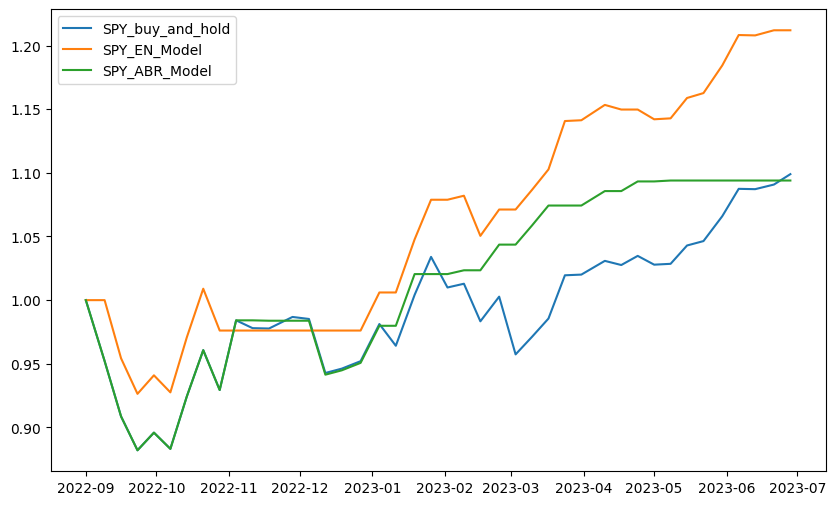

In [84]:
# Plot settings
pyplot.rcParams["figure.figsize"] = (10,6)
# Plot the buy and hold curve
pyplot.plot(df_equity['SPY_pred'].cumprod(), label='SPY_buy_and_hold')
# Plot the ElasticNet model curve
pyplot.plot(df_equity['en_curve'].cumprod(), label='SPY_EN_Model')
# Plot the ABR model curve
pyplot.plot(df_equity['abr_curve'].cumprod(), label='SPY_ABR_Model')
pyplot.legend()
pyplot.show()

We can see that the ElasticNet model successfully avoids the declines 2022 Q4 and in 2023 Q1; as a result, it has better performance.

###### <a id='8.2'></a>
## 8.2 White Reality Check

Let's check our ElasticNet model through White reality check.

In [85]:
import WhiteRealityCheckFor1 
import detrendPrice

In [86]:
t = Y_test.index
positions = np.where(en_predictions > 0, 1, 0)
dataset_index= pd.to_datetime(dataset.index)

average return 0.081311
[-0.18108611  0.18249089]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.18359999999999999


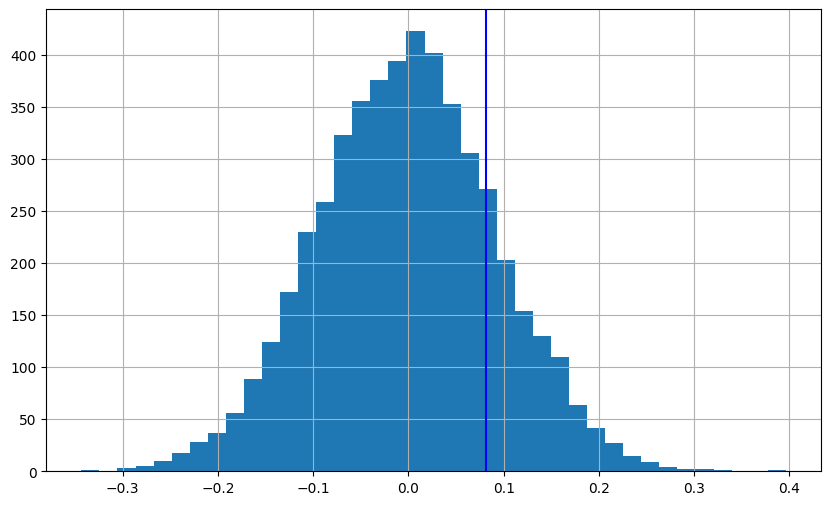

In [87]:
#Detrending Prices and Returns and white reality check
detrended_close = detrendPrice.detrendPrice(dataset.loc[Y_test.index]['SPY'])
detrended_retFut1 = detrended_close.pct_change(periods=1).shift(-1).fillna(0)
detrended_syst_rets = detrended_retFut1 * pd.Series(positions).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets[1:-1])
plt.show()

The p-value is around 0.18; it is not statistically significant (95th percentile), but the results (Sharpe ratio and CAGR) are not too bad. And it is worth of spending time investigating this model.

<a id='9'></a>
## 9. Walk-forward harness

In the previous section, we fit the model with the training data, while predicting the return in the test period. There are three problems:
- the validation dataset does not contribute to the prediction of the test period
- we are using the training set to fit the model, which is not the latest data at the time we predict the returns in the test period
- we predict the whole test set at the same time; we do not use the "past" test data to predict the "future" test data.

Let's perform a walk-forward harness. Basically, we keep the hyper-parameters from the training-validation process, but we will use the latest data to do prediction.

In [88]:
Y_test_walk = Y_test.copy()
Y_test_walk.name = 'Y_walk'

In [89]:
for i in range(len(Y_test)):
    # add 1 data point at each step
    # keep the same data size
    X_train_walk = pd.concat([X_train, X_valid, X_test.iloc[:i]]).iloc[-len(X_train):]
    Y_train_walk = pd.concat([Y_train, Y_valid, Y_test.iloc[:i]]).iloc[-len(X_train):]
    X_test_walk = X_test.iloc[i:i+1]
    
    en_walk = ElasticNet(alpha = EN_best_params[0], l1_ratio = EN_best_params[1])
    en_walk.fit(X_train_walk, Y_train_walk)
    en_walk_predictions = en_walk.predict(X_test_walk)
    Y_test_walk.iloc[i] = en_walk_predictions

In [90]:
df_walk = pd.concat([np.exp(Y_test),np.exp(Y_test_walk)],axis=1)
df_walk['en_curve'] = df_walk['SPY_pred'][df_walk['Y_walk'] >=1]
df_walk = df_walk.fillna(1)
df_walk['SPY_pct_return'] = df_walk['SPY_pred'] - 1
df_walk['en_pct_return'] = df_walk['en_curve'] - 1
df_walk.head()

SPY_pred    Y_walk  en_curve  SPY_pct_return  en_pct_return
Date                                                                   
2022-09-09  0.952149  0.985584  1.000000       -0.047851       0.000000
2022-09-16  0.954326  1.004828  0.954326       -0.045674      -0.045674
2022-09-23  0.970730  0.999985  1.000000       -0.029270       0.000000
2022-09-30  1.015706  0.999864  1.000000        0.015706       0.000000
2022-10-07  0.985777  1.006819  0.985777       -0.014223      -0.014223

In [91]:
sharpe_walk = (df_walk['en_pct_return'].mean() - risk_free)/ df_walk['en_pct_return'].std() * np.sqrt(252/return_period)
print('The sharpe ratio of the ElasticNet model under walk forward harness:', round(sharpe_walk,2))

The sharpe ratio of the ElasticNet model under walk forward harness: 1.34


In [92]:
CAGR_walk = df_walk['en_curve'].cumprod()[-1]**(252/return_period/len(df_walk)) - 1
print('The CAGR of the ElasticNet model under walk forward harness:', round(CAGR_walk*100,2), '%')

The CAGR of the ElasticNet model under walk forward harness: 22.28 %


In [93]:
# normalize the equity curve on the first day (i.e., the last validation date)
df_walk = pd.concat([pd.DataFrame(index=Y_valid.index[-1:],data={'SPY_pred':1,'Y_walk':1,'en_curve':1}),df_walk],axis=0)

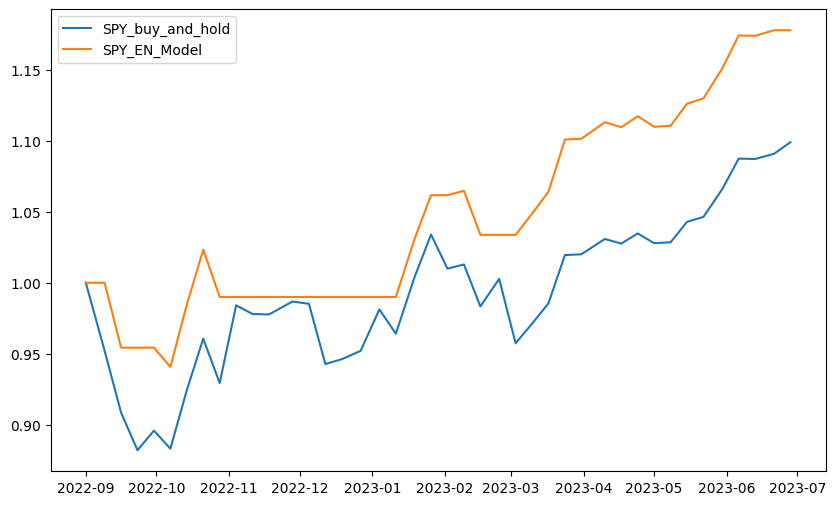

In [94]:
pyplot.plot(df_walk['SPY_pred'].cumprod(), label='SPY_buy_and_hold')
pyplot.plot(df_walk['en_curve'].cumprod(), label='SPY_EN_Model')
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (10,6)
pyplot.show()

The results are similar to the last section, which may be because:
- the training set (195 data points) is much larger than the validation set (41), so it still dominates the fiting process
- our model is not sensitive to the new incoming data points, which means that our model is quite stable. Hence, the Sharpe ratios and CAGRs, both prior to and subsequent, are comparable.

### Summary

- Simple models, like regularized regression (Lasso and Elastic Net), can be very effective for asset price prediction when combined with a comprehensive set of indicators.
- Time series models like ARIMA and deep learning models like LSTM offer additional avenues for prediction but may require careful tuning and validation.
- It's crucial to evaluate models not just on their prediction accuracy but also on metrics that capture risk and profitability, like the Sharpe ratio.
- A walk-forward harness is a valuable tool to ensure that models are tested in a manner that's reflective of real-world trading, where we continually update our models with the latest data.
- Lastly, while the statistical significance of White Reality Check is important, practical significance (i.e., the potential profitability of a trading strategy) should not be overlooked.
- In conclusion, the project showcased the potential of machine learning and data science in predicting stock return. We can realize the importance of data preprocessing, feature engineering, model selection, and evaluation in achieving reliable and actionable insights.